# **BAB 1 - INTRODUCTION**

___
Nama : Ma'ruf Habibie Siregar  
Batch : HCK028  
Link Dashboard : [Link Dashboard Page 1](https://public.tableau.com/views/StreamWise/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) and [Link Dashboard Page 2](https://public.tableau.com/shared/757GHG5ZW?:display_count=n&:origin=viz_share_link)  
Program ini dibuat untuk memberi rekomendasi film-film kepada platform streaming online dalam membeli atau menyewa film untuk ditayangkan di platformnya
___

# **BAB 2 - PROBLEM STATEMENT DAN DATASET DESCRIPTION**

## 2.1 Background  
Dalam beberapa tahun terakhir cara orang menikmati film sudah berubah. Kebanyakan orang tidak lagi menonton televisi ataupun pergi ke bioskop. Saat ini masyarakat lebih memilih layanan **streaming online**, karena dinilai **praktis** dan **flexsibel** serta dapat ditonton dan diakses kapanpun, dimanapun.

Untuk menciptakan platform streaming film diperlukan banyak analisa dalam berbagai aspek, mulai dari **UI/UX yang menarik dan mudah**, **preferensi pengguna**, dan **konten yang berkualiatas serta banyak peminatnya**. Dengan banyaknya platform streaming online sekarang ini, membuat begitu banyak **persaingan** yang menuntut hal-hal tersebut.

Maka dari itu dibutuhkan **analisa yang jelas dan akurat berdasarkan data**, agar film-film yang ditayangkan adalah film yang **berkualitas** dan **banyak peminatnya**. Sebaiknya diperlukan aspek yang pasti untuk menganalisanya seperti **komentar dan rating dari ahli film atau biasa disebut kritikus film**.

## 2.2 Topik Permasalahan  
Tantangan utama bagi penyedia platform online adalah bagaimana memilih **konten yang berkualitas dan diminati oleh penonton**.

## 2.1 Problem Statement  
Mengetahui **preferensi film penikmat dan kritikus film** untuk membantu platform streaming memilih film yang tepat untuk dibeli atau disewa.

**SMART**

* **Specific**   : Mencari tau preferensi film dari tahun **1989 sampai 2019** untuk membantu platform streaming online memilih film yang mau mereka sewa atau beli  
* **Measurable**  : Mengukur preferensi film berdasarkan :  
                    - Rata-rata rating kritikus dengan standard minimal rating **70/100** (standard rotten fresh) dengan minimal kritikus count di angka **50**.  
                    - Rata-rata rating audience dengan standard **70/100** dengan minimal audience count di angka **25.000** (Top IMDB 250)  
                    - **Top 5 genre**  
                    - Rata-rata rating audience dan kritikus berdasarkan nama **director**  
                    - Analisis popularitas serta kontribusi **cast utama (top 3 cast)** dan **popular cast** terhadap rating dan rekomendasi film.
  
* **Achievable**  : Dengan menganalisis dataset **Rotten_Tomatoes**, sebuah situs terpercaya yang dimana bukan hanya penonton saja yang aktif merating film tapi ada juga kritikus yang bisa jadi pembeda.    
* **Relevent**    : Kualitas film yang bagus dan bervariasi **memicu penonton untuk terus berlangganan** platform streaming tersebut  
* **Time-bound**  : Analisi dan Rekomendasi film akan diselesaikan dalam jangka waktu **3 hari**

Menganalisis preferensi film berdasarkan **rating kritikus, rating penonton, genre, director, dan cast** menggunakan dataset Rotten Tomatoes yang terpercaya akan dilakukan dalam jangka waktu 3 hari untuk memberikan rekomendasi yang membantu platform streaming online dalam memilih film yang tepat untuk disewa atau dibeli demi **meningkatkan kualitas konten dan mempertahankan pelanggan**.

## 2.4 Penjabaran Masalah  
- Apa film yang **kritikus rating dan audience ratingnya paling tinggi**?  
- Studio mana yang memproduksi paling banyak film yang dari tahun **1989 sampai 2019**?  
- Bagaimana **tren genre film** dari tahun 1989 sampai 2019?  
- Apakah nama **director mempengaruhi rating pentonton dan kritikus**? Dan Mengapa itu bisa terjadi  
- Siapa director yang memiliki **rata-rata rating filmnya paling tinggi**?  
- Berapa **rata-rata durasi film** dari tahun 1989 sampai 2019?  
- Apakah **durasi film mempengaruhi rating penonton**? Dan Mengapa itu bisa terjadi?  
- Apakah **nama-nama cast mempengaruhi rating penonton dan rating kritikus**? jika 'IYA' Bagaimana **rekomendasi film yang tepat berdasarkan kombinasi data rating, director, dan cast populer**?

## 2.5 Dataset Description  

- **Deskripsi** : Dataset ini berisi tentang rating film dari website Rotten Tomatoes yang berisi **15.000 ++ data**. Yang didalamnya terdapat keterangan **judul film, info film, critic consensus, age rating, genre, date on theater, date on streaming, director, writer, cast, runtime in minutes, studio name, tomatometer status, tomatometer rating, tomatomater count, audience rating, dan audience count**  
- **Sumber** : Kaggle Database  
- **Link** : https://www.kaggle.com/datasets/subhajournal/movie-rating  


# **BAB 3 - DATA LOADING**

## 3.1 Import Package

Pada tahap ini saya akan mengimport **library-library** yang diperlukan dalam proyek ini

In [88]:
#Import Libraries yang diperlukan
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, sem, kruskal
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from scipy.stats import spearmanr
import scipy.stats as stats
import openpyxl
import requests
import time

## 3.2 Loading Data Keseluruhan

Di tahap ini saya akan melakukan loading data, dimana data yang saya ambil berasal dari [kaggle](https://www.kaggle.com/datasets/subhajournal/movie-rating)

In [3]:
# Import file csv
df = pd.read_csv('Rotten Tomatoes Movies.csv')

pd.set_option('display.max_colwidth', 30)
#Show dataframe
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympi...,A teenager discovers he's ...,Though it may seem like ju...,PG,"Action & Adventure, Comedy...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. J...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind...,Nicole Holofcener's newest...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda P...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Du...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Ju...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry...,A Puerto Rican youth is on...,Sidney Lumet's feature deb...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedle...",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",This 1954 Disney version o...,One of Disney's finest liv...,G,"Action & Adventure, Drama,...",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas,...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


**Insight** :  
1. Dari data frame diatas bisa saya ambil kesimpulan ada nilai **NaN/Null di kolom critics_consensus**. Maka dari itu saya akan cek lebih lanjut  
2. Ada beberapa kolom yang bisa saya hapus karena tidak kita gunakan.  
  Kolomnya adalah  
    * **movie_info** : karena bersifat deskriptif, hanya menjelaskan tentang filmnya, dan itu tidak perlu digunakan untuk analisis rekomendasi film  
    * **critic_consensus** : banyak NaN, dan ini berisi opini dan tidak digunakan dalam analisis statistik  
    * **rating** : ini berisi tentang kategori rekomendasi umur penonton yang tidak perlu digunakan karena fokusnya disini adalah minat penonton secara umum  
    * **writers** : fokus kita pada **director**, jadi ini bisa dihapus. Director juga biasanya jauh relevan dibanding writer. Sutradara/director terkenal seperti **Christopher Nolan, Steven Spielberg, James Gunn, dll** biasa lebih sering jadi faktor penting dalam keputusan penonton menonton film tertentu.  
    * **on_streaming_date** : kita fokus pada **release year** saja untuk menyederhanakan yang berhubungan dengan "datetime"


## 3.3 Cek Info Data Frame

In [4]:
# Mengecek info dari data frame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

Insight : 
1. Dari info data diatas bisa dilihat ada **1 kolom yang tipe datanya perlu kita ubah**, **dari object ke datetime** yaitu kolom **'on streaming date'**
2. Info di atas juga melihatkan beberapa **kolom yang ada value null** , maka dari itu saya perlu **menghandle missing valuenya** tapi dengan catatan saya harus** **memfilter film dari tahun  di 1989 sampai tahun 2019** terlebih dahulu


# **BAB 4 - DATA CLEANING**

## 4.1 Menghapus Kolom Yang Tidak Terpakai

In [5]:
# Menghapus kolom yang tidak mau di gunakan
df_v2 = df.drop(columns=['movie_info', 'critics_consensus', 'rating' , 'writers','on_streaming_date'])
# Mengecek apakah kolom yang ingin dihapus sudah terhapus
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   genre               16621 non-null  object 
 2   directors           16524 non-null  object 
 3   cast                16354 non-null  object 
 4   in_theaters_date    15823 non-null  object 
 5   runtime_in_minutes  16483 non-null  float64
 6   studio_name         16222 non-null  object 
 7   tomatometer_status  16638 non-null  object 
 8   tomatometer_rating  16638 non-null  int64  
 9   tomatometer_count   16638 non-null  int64  
 10  audience_rating     16386 non-null  float64
 11  audience_count      16386 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.5+ MB


Insight :  
Bisa dilihat dari info dataframe di atas bahwa **kolom-kolom yang tidak ingin saya pakai sudah terhapus**.

## 4.2 Mengubah Tipe Data

In [6]:
#Mengubah tipe data kolom "in_theaters_date"
df_v2['in_theaters_date'] = pd.to_datetime(df_v2['in_theaters_date'], errors='coerce')
#Mengecek apakah tipe data sudah berubah
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   genre               16621 non-null  object        
 2   directors           16524 non-null  object        
 3   cast                16354 non-null  object        
 4   in_theaters_date    15823 non-null  datetime64[ns]
 5   runtime_in_minutes  16483 non-null  float64       
 6   studio_name         16222 non-null  object        
 7   tomatometer_status  16638 non-null  object        
 8   tomatometer_rating  16638 non-null  int64         
 9   tomatometer_count   16638 non-null  int64         
 10  audience_rating     16386 non-null  float64       
 11  audience_count      16386 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.5+ MB


Insight :  
Dari info dataframe di atas, tipe data kolom in_theaters_date **telah berubah** dari **"object"** menjadi **"datetime"**

## 4.3 Mem-filter Film berdasarkan tahun streaming di 1999 sampai 2019

Sebelum melakukan filter tahun, saya akan mengextract dahulu tahun dari kolom 'in_theaters_date'

In [7]:
# Mengextract tahun dari release year
df_v2['release_year'] = df_v2['in_theaters_date'].dt.year
# Melihat hasil extract
df_v2.head(5)

,movie_title,genre,directors,cast,in_theaters_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
0,Percy Jackson & the Olympi...,"Action & Adventure, Comedy...",Chris Columbus,"Logan Lerman, Brandon T. J...",2010-02-12,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0
1,Please Give,Comedy,Nicole Holofcener,"Catherine Keener, Amanda P...",2010-04-30,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,2010.0
2,10,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Ju...",1979-10-05,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0,1979.0
3,12 Angry Men (Twelve Angry...,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedle...",1957-04-13,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0,1957.0
4,"20,000 Leagues Under The Sea","Action & Adventure, Drama,...",Richard Fleischer,"James Mason, Kirk Douglas,...",1954-01-01,127.0,Disney,Fresh,89,27,74.0,68860.0,1954.0


Insight :  
kolom release_year sudah dibuat  

Setelah kolom release_year telah dibuat saya akan melakukan pengecekan missing value dahulu sebelum memfilter tahunnya dari tahun 1989 - 2019.

In [8]:
#Mengecek Naan Value di release_year
missing_ry = df_v2[df_v2['release_year'].isnull()]
missing_ry

,movie_title,genre,directors,cast,in_theaters_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
58,All Quiet on the Western F...,Drama,Delbert Mann,"Richard Thomas, Ernest Bor...",NaT,150.0,Unknown,Fresh,100,5,70.0,7571.0,NaN
71,The Silence,"Action & Adventure, Drama,...",Cate Shortland,"Richard Roxburgh, Essie Da...",NaT,104.0,NaN,Rotten,50,6,38.0,374.0,NaN
156,The Broken,"Horror, Mystery & Suspense",Sean Ellis (II),"Lena Headey, Richard Jenki...",NaT,88.0,After Dark Films,Rotten,49,39,25.0,2543.0,NaN
264,Three Blind Mice,"Comedy, Drama",Matthew Newton,"Matthew Newton, Toby Schmi...",NaT,93.0,IFC Films,Fresh,80,5,50.0,229.0,NaN
292,Avenging Angel,"Action & Adventure, Drama,...",Robert Vincent O'Neil,"Betsy Russell, Rory Calhou...",NaT,94.0,Starmaker Entertainment,Rotten,33,6,26.0,1541.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,You Got Served: Beat The W...,Drama,Robert Adetuyi,"Tyrone Brown, Mishael Morg...",NaT,91.0,Sony Pictures Home Enterta...,Rotten,0,5,20.0,373.0,NaN
16555,You Might Be the Killer,Horror,Brett A. Simmons,"Fran Kranz, Alyson Hanniga...",NaT,88.0,Curmudgeon Films,Rotten,59,17,54.0,106.0,NaN
16584,Your Son (Tu Hijo),Drama,Miguel Ángel Vivas,"José Coronado, Ana Wagener...",NaT,NaN,Netflix,Fresh,100,5,57.0,45.0,NaN
16601,Zambezia,"Animation, Comedy",Wayne Thornley,"Abigail Breslin, Jeff Gold...",NaT,84.0,Sony Pictures Home Enterta...,Rotten,25,8,43.0,755.0,NaN


Insight :  
- Saya dapatkan ada 815 baris yang terdapat missing value
- Saya akan mengisi missing value tersebut menggunakan inputan dari OMDb API dengan alasan
    * Agar data yang masuk mayoritas data real
    * Jika ternyata ada data film yang tidak ada di OMDB maka saya akan coba input manual kalau datanya kurang dari 20 data
    * Kalau datanya lebih dari 20 maka saya akan coba input dari TMDBb API

In [9]:
# Mengisi NaN value di kolom release_year dari OMDB Api
API_KEY = "c094662d"

def get_release_year_from_omdb(title):
    url = f"http://www.omdbapi.com/?apikey={API_KEY}&t={requests.utils.quote(title)}"
    try:
        response = requests.get(url)
        data = response.json()
        if data.get('Response') == 'True' and data.get('Year'):
            year_str = data['Year']
            # Ambil tahun pertama jika rentang tahun, contoh '2010–2015' ambil '2010'
            year = int(year_str.split('–')[0])
            return year
        return None
    except Exception as e:
        print(f"Error fetching release year for '{title}': {e}")
        return None

print("Memulai update kolom 'release_year' yang kosong...")

for idx, row in df_v2.iterrows():
    if pd.isnull(row['release_year']):
        title = row['movie_title']
        year = get_release_year_from_omdb(title)
        if year is not None:
            df_v2.at[idx, 'release_year'] = year
            print(f"Updated release year for '{title}': {year}")
        else:
            print(f"Release year not found for '{title}'")
        time.sleep(0.2)  # delay supaya tidak terkena rate limit OMDb API

print("Update kolom 'release_year' selesai.")
print(f"Sisa missing release year setelah update: {df_v2['release_year'].isnull().sum()}")

Memulai update kolom 'release_year' yang kosong...
Updated release year for 'All Quiet on the Western Front': 2022
Updated release year for 'The Silence': 2019
Updated release year for 'The Broken': 2008
Updated release year for 'Three Blind Mice': 1938
Updated release year for 'Avenging Angel': 1985
Updated release year for 'The Big Heat': 1953
Updated release year for 'The Big Sleep': 1946
Updated release year for 'Black Rain': 1989
Updated release year for 'Breakout': 1975
Updated release year for 'Dragnet': 1987
Updated release year for 'The Eagle Has Landed': 1976
Updated release year for 'Fun with Dick and Jane': 2005
Updated release year for 'Hard Times': 1975
Updated release year for 'The Hunchback of Notre Dame': 1996
Updated release year for 'The Importance of Being Earnest': 2002
Updated release year for 'The Little Drummer Boy': 1968
Updated release year for 'Made in Heaven': 2019
Updated release year for 'Sinbad the Sailor': 1947
Updated release year for 'That Championship

Insight :  
- Bisa terlihat dari info dataframe diatas bahwa kolom 'release_year' sudah diisi mayoritasnya dari OMDB API.  
- Ada sisa missing value sekitar 90 rows, Saya akan coba menggunaka API lain yaitu TMDBb untuk mengisi 90 baris tersebut

In [10]:
API_KEY_TMDB = "bcc8613f30ea6704eba74c8c804b98c9"
BASE_URL_TMBD = "https://api.themoviedb.org/3"

def tmdb_search_movie(title):
    """Cari movie di TMDb berdasarkan judul, kembalikan movie id hasil pertama."""
    search_url = f"{BASE_URL_TMBD}/search/movie"
    params = {
        'api_key': API_KEY_TMDB,
        'query': title,
        'include_adult': False
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data['results']:
        return data['results'][0]['id']
    return None

def tmdb_get_movie_details(movie_id):
    """Ambil detail movie, khususnya release_date."""
    detail_url = f"{BASE_URL_TMBD}/movie/{movie_id}"
    params = {
        'api_key': API_KEY_TMDB,
    }
    response = requests.get(detail_url, params=params)
    if response.status_code == 200:
        return response.json()
    return None

def get_release_year_from_tmdb(title):
    movie_id = tmdb_search_movie(title)
    if not movie_id:
        return None
    details = tmdb_get_movie_details(movie_id)
    if details and details.get('release_date'):
        release_date = details['release_date']  # Format 'YYYY-MM-DD'
        release_year = int(release_date.split('-')[0])
        return release_year
    return None

print("Memulai update kolom release_year menggunakan data TMDb API...")

for idx, row in df_v2.iterrows():
    if pd.isnull(row.get('release_year')):
        title = row['movie_title']
        release_year = get_release_year_from_tmdb(title)
        if release_year is not None:
            df_v2.at[idx, 'release_year'] = release_year
            print(f"Updated release_year for '{title}' to {release_year}")
        else:
            print(f"Data release_year not found for '{title}'")
        time.sleep(0.25)  # delay supaya tidak terkena rate limit TMDb

print("Update selesai.")
print("Sisa missing pada release_year:", df_v2['release_year'].isnull().sum())


Memulai update kolom release_year menggunakan data TMDb API...
Updated release_year for 'Angel Rodriguez' to 2005
Updated release_year for 'A Fortunate Man (Lykke-Per)' to 2018
Updated release_year for 'Adventures of a Teenage Dragonslayer' to 2010
Updated release_year for 'All Is Well (Alles ist gut)' to 2018
Updated release_year for 'Alone (Solo)' to 2001
Updated release_year for 'Animals United (Konferenz der Tiere)' to 2010
Updated release_year for 'Bai ri yan huo (Black Coal, Thin Ice)' to 2014
Updated release_year for 'Batman Vs. Robin' to 2015
Updated release_year for 'Bring Me the Head of the Machine Gun Woman (Tráiganme la cabeza de la mujer metralleta)' to 2012
Data release_year not found for 'Canary (Kanarie)'
Updated release_year for 'Chris Rock: Tamborine' to 2018
Updated release_year for 'Cold Sweat (Sudor frío)' to 2010
Updated release_year for 'Correspondence (La corrispondenza)' to 2016
Updated release_year for 'Cub (Welp)' to 2014
Updated release_year for 'Daguerrotyp

Insight :  
- Bisa terlihat bahwa sisa missing value pada release_year adalah 10 kolom  
- Saya akan melakukan input manual dengan mencari release_year pada film tersebut  

In [11]:
#Cek judul film yang release_yearnya missing
missing_ry_2 = df_v2[df_v2['release_year'].isnull()]
pd.set_option('display.max_colwidth', None)
missing_ry_2

,movie_title,genre,directors,cast,in_theaters_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
4047,Canary (Kanarie),"Drama, Musical & Performing Arts",Christiaan Olwagen,"Schalk Bezuidenhout, Hannes Otto, Germandt Geldenhuys, Gerard Rudolf, Jacques Bessenger",NaT,123.0,Breaking Glass Pictures,Fresh,100,12,NaN,NaN,NaN
4968,DCU: Justice League: The Flashpoint Paradox,"Action & Adventure, Animation",Jay Oliva,"Cary Elwes, Nathan Fillion, Ron Perlman, C. Thomas Howell, Kevin Mckidd",NaT,95.0,WARNER BROTHERS PICTURES,Fresh,100,5,92.0,5640.0,NaN
8928,LFO: The Movie,"Drama, Science Fiction & Fantasy",Antonio Tublen,"Patrik Karlson, Johanna Tschig, Per Löfberg, Ahnna Rasch, Lukas Loughran",NaT,94.0,Dark Sky Films,Fresh,100,6,66.0,146.0,NaN
9112,London's Finest (Hackney's Finest),"Action & Adventure, Comedy, Mystery & Suspense",Chris Bouchard,"Nathanael Wiseman, Arin Alldridge, Enoch Frost, Marlon G. Day, Rajan Sharma",NaT,90.0,NaN,Rotten,40,5,35.0,37.0,NaN
10660,Okami kodomo no ame to yuki (The Wolf Children Ame and Yuki),"Animation, Science Fiction & Fantasy","Mamoru Hosoda, Rick Ostermann","Kumiko Aso, Megumi Hayashibara, Aoi Miyazaki, Takao Osawa, Takuma Hiraoka, Levin Liam, Helena Phil, Vivien Ciskowska, Patrick Lorenczat, Willow Voges Fernandes, Til-Niklas Theinert, Jördis Triebel",NaT,110.0,NaN,Fresh,94,18,92.0,2844.0,NaN
12106,Sammy's Adventures 2 (Sammy's avonturen 2),"Action & Adventure, Animation, Art House & International, Kids & Family","Ben Stassen, Vincent Kesteloot","Pat Carroll, Carlos McCullers II, Isabelle Fuhrman, Melanie Griffith, Billy Unger, Chris Andrew Ciulla, Wesley Johnny, Thomas Lee, Carter Hastings, Dennis O'Connor, Shyloh Oostwald, Joe J. Thomas",NaT,92.0,Studio Canal,Rotten,20,10,34.0,403.0,NaN
12339,Chat gim (The Seven Swords),"Action & Adventure, Classics",Hark Tsui,"Donnie Yen, Charlie Yeung, Leon Lai, Charlie Yeung, Yi Lu, Lau Kar Leung, Yi-Ching Lu, Honglei Sun, So-yeon Kim, Kim So Yeun, Duncan Chow, Tai Liwu, Tai Liwu, Jingchu Zhang, Jason Lau, Kuan-Chun Chi, Ma Jingwu, Michael Wong, So Yeun, Huang Peng",NaT,151.0,Mandarin Films,Rotten,25,16,55.0,7930.0,NaN
14972,The Trial of Billy Jack (El Juicio de Billy Jack),"Action & Adventure, Classics, Drama",Tom Laughlin,"Tom Laughlin, Delores Taylor, Victor Izay, William Wellman Jr., Teresa Laughlin, Russell Lane, Michelle Wilson, Geo Anne Sosa, Lynn Baker, Riley Hill, Malcolm ""Sparky"" Watt, Gus Greymountain, Sacheen Littlefeather, Michael Bolland, Jack Stanley, Master Bong Soo Han, Rolling Thunder, Sandra Ego, Trinidad Hopkins, Marianne Hall, Jason Clark, Hot Tub Johnny West, Buffalo Horse, Dennis O'Flaherty, George Aguilar, Pepper Rogers, Teda Bracci, Susan Sosa, Ron Nix, Michael J. Shigezane, Ken Tealor, Evans Thornton, Jack White, Hosea Barnett, David Scott Clark, Jean Newburn, Debbie Hill, Diane Webber, Oshannah Fastwolf, Kathy Cronkite, DeLaura Henry, Patricia McCulloch, Alexandra Nicholson",NaT,170.0,Taylor-Laughlin Distribution,Rotten,50,6,49.0,2098.0,NaN
15904,Visions of 8 - The Olympics of Motion Picture Achievement,"Documentary, Sports & Fitness","John Schlesinger, Mai Zetterling, Milos Forman, Claude Lelouch, Kon Ichikawa, Yuriy Ozerov, Arthur Penn, Michael Pfleghar",NaN,NaT,109.0,Bavaria Atelier,Rotten,40,5,58.0,32.0,NaN
16125,Wetlands Preserved: The Story of an Activist Rock Club,"Documentary, Musical & Performing Arts, Special Interest",Dean Budnick,"311, Agnostic Front, Ben Harper, Robert Randolph, Larry Bloch, Al Schnier, Bob Weir, Ryan Miller, Dave Matthews, Nick Hexum, Darius Rucker, Adam Weissman, Warren Haynes, Vinnie Stigma, Mike Gordon, Jimmy T, Jake Szufnarowski, Chris Zahn, Rob Derhak, Mike Doughty, Walter Durkacz, Hanson, Kenneth Jackson, Pearl Jam, Phish, The Roots, Ahmir ""Questlove"" Thompson",NaT,97.0,NaN,Fresh,91,11,73.0,48.0,NaN


In [12]:
# Mengisi NaN value di kolom release_year dengan input manual
release_year_dict = {
    "Canary (Kanarie)": 2018,
    "DCU: Justice League: The Flashpoint Paradox": 2013,
    "LFO: The Movie": 2013,
    "London's Finest (Hackney's Finest)": 2018,
    "Okami kodomo no ame to yuki (The Wolf Children Ame and Yuki)": 2012,
    "Sammy's Adventures 2 (Sammy's avonturen 2)": 2012,
    "Chat gim (The Seven Swords)": 2005,  
    "The Trial of Billy Jack (El Juicio de Billy Jack)": 1974,
    "Visions of 8 - The Olympics of Motion Picture Achievement": 1973,
    "Wetlands Preserved: The Story of an Activist Rock Club": 2017,
}

for i, row in df_v2.iterrows():
    if pd.isnull(row['release_year']):
        movie = row['movie_title']
        if movie in release_year_dict:
            df_v2.at[i, 'genre'] = release_year_dict[movie]


In [13]:
#Mengecek lagi apakah ada missing value
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   genre               16621 non-null  object        
 2   directors           16524 non-null  object        
 3   cast                16354 non-null  object        
 4   in_theaters_date    15823 non-null  datetime64[ns]
 5   runtime_in_minutes  16483 non-null  float64       
 6   studio_name         16222 non-null  object        
 7   tomatometer_status  16638 non-null  object        
 8   tomatometer_rating  16638 non-null  int64         
 9   tomatometer_count   16638 non-null  int64         
 10  audience_rating     16386 non-null  float64       
 11  audience_count      16386 non-null  float64       
 12  release_year        16628 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), ob

Terlihat dari info diatas bahwa missing value di kolom release_year sudah selesai. Setelah ini saya akan memfilter tahun release dari 1989 ke 2019 serta saya akan menghapus kolom 'in_theater_date' karena sudah ada kolom 'release_year' yang mewakili.

In [14]:
#Memfilter tahun dengan ketentuan dari tahun 1989 - 2019
df_v3 = df_v2[(df_v2['release_year'] >= 1989) & (df_v2['release_year'] <= 2019)]

# Mengecek apakah tahunnya sudah dari tahun 1989 sampai 2019
min_year = df_v3['release_year'].min()
max_year = df_v3['release_year'].max()
print(f"Tahun release sudah dari {int(min_year)} sampai {int(max_year)}")

Tahun release sudah dari 1989 sampai 2019


Insight :  
Tahun telah di filter dengan ketentuan tahun release dari 1989 sampai 2019.  

In [15]:
# Menghapus kolom in_theater_date
df_v3 = df_v3.drop(columns=['in_theaters_date'])

#Cek apakah kolom in_theater_date sudah terhapus
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13210 non-null  object 
 2   directors           13120 non-null  object 
 3   cast                12949 non-null  object 
 4   runtime_in_minutes  13073 non-null  float64
 5   studio_name         12886 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     12989 non-null  float64
 10  audience_count      12989 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.3+ MB


Insight :  
Kolom in_theaters_date telah terhapus

## 4.4 Handle Missing Values

Pada tahap ini saya akan melakukan handling pada missing value di beberapa kolom. Sebelum itu saya akan mengecek kolom mana yang ada missing value-nya.

In [16]:
#Mengecek kolom-kolom yang terdapat Missing Value
df_v3.isnull().sum()

movie_title             0
genre                  16
directors             106
cast                  277
runtime_in_minutes    153
studio_name           340
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating       237
audience_count        237
release_year            0
dtype: int64

Insight :  
- Dari info data frame di atas saya dapatkan bahwa ada missing value di beberapa kolom, yaitu :
    * genre = 16 baris
    * directors = 106 baris
    * cast = 277 baris
    * runtime_in_minutes = 153 baris
    * studio_name = 340 baris
    * audience_rating = 237 baris
    * audience_count = 237 baris

### 4.4.1 Handle Missing Value pada Genre

Pada tahap ini saya akan melakukan handling missing value pada kolom genre. Saya akan melakukan input perbaris karena cuma ada 16 baris yang missing. Saya akan mencari judul film tersebut secara manual dan melihat genre serta menginputnya. Saya mencarinya di dalam website Rotten Tomatoes itu sendiri.

In [17]:
#Cek nama film
missing_genre_rows = df_v3[df_v3['genre'].isnull()]
missing_genre_rows

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
1927,400 Days,NaN,Matt Osterman,"Brandon Routh, Caity Lotz, Ben Feldman, Dane Cook, Tom Cavanagh, Grant Bowler, Sally Pressman, Fernanda Romero, Frank Ashmore, Dominic Bogart, Rene Bremond, Oz Kalvan, Iris Karina, Nicole Derseweh, Mark Steger, Luke Barnett, Sara Tomko, Kim Estes, Robert Lewis Stephenson, Nick Jameson, Stevens Gaston",91.0,New Artists Alliance,Rotten,22,9,41.0,2108.0,2016.0
2449,All the Way,NaN,Jay Roach,"Bryan Cranston, Anthony Mackie, Bradley Whitford, Melissa Leo, Aisha Hinds, Frank Langella, Stephen Root, Mo McRae, Spencer Garrett, Todd Weeks, Toby Huss, Bo Foxworth, Marque Richardson II, Joe Morton",132.0,Amblin Television,Certified Fresh,88,33,83.0,2822.0,2016.0
3088,Batman: Hush,NaN,Justin Copeland,"Jason O'Mara, Bruce Thomas, Rebecca Romijn, Peyton List (II), Jennifer Morrison, Rainn Wilson",81.0,NaN,Fresh,88,17,67.0,6.0,2019.0
3091,Batman: Return Of The Caped Crusaders,NaN,Rick Morales,"Steven Weber, Adam West, Burt Ward, Julie Newmar, Wally Wingert",72.0,Warner Bros. Animation,Fresh,94,18,67.0,474.0,2016.0
3100,Batman vs. Two-Face,NaN,Rick Morales,"Adam West, Burt Ward, William Shatner, Julie Newmar, Steven Weber, Jim Ward, Thomas Lennon, Lynne Marie Stewart",72.0,DC Entertainment,Fresh,100,8,60.0,174.0,2017.0
5125,Descendants 2,NaN,Kenny Ortega,"Sofia Carson, Booboo Stewart, Cameron Boyce, Mitchell Hope, China Anne McClain, Thomas Doherty, Dylan Playfair, Dove Cameron",30.0,NaN,Fresh,67,6,72.0,832.0,2017.0
8121,Jane Wants a Boyfriend,NaN,William Sullivan,"Louisa Krause, Eliza Dushku, Amir Arison, Gabriel Ebert, Gary Hilborn, Franco Gonzalez, Jarret Kerr, Nick Stevenson, Polly Draper, Richard Murphy, Gregg Edelman, Chris Norwood, Anisha Nagarajan, Sarah Wharton, Kristina Mueller, Benj Mirman, Bianca Rutigliano, Hannah Brady, Margaux Susi, Lindsay Arber, Holly Chou, Greg Keller, Dayle Towarnicky, Cynthia Vazquez, Jon Bass (II), Elise Toscano, Elizabeth Gray, Nathaniel Peart, Collin Leydon, Tommy Nelms, Schuyler Winter, Lance Roberts, Harrison Buck, Tim Pioppo",101.0,Copperline Creative,Rotten,29,7,63.0,234.0,2016.0
8359,Justice League vs the Fatal Five,NaN,Sam Liu,"Elyes Gabel, Diane Guerrero, Tara Strong, Noel Fisher, Tom Kenny, George Newbem",87.0,Warner Bros,Fresh,100,8,65.0,40.0,2019.0
9197,Lost in the Sun,NaN,Trey Nelson,"Josh Duhamel, Josh Wiggins, Lynn Collins, Emma Fuhrmann, June Griffin Garcia, Rebecca Chulew, Deborah Abbott, Robert Johnson, Larry Jack Dotson, Catherine Lawrence Kinslow, Teagan Jai Boyd, Al Hayter, Luis Olmeda, Michael Anthony Jackson, David Lambert, Beau Smith, Tim Mateer, Kevin Patrick Connors, Timothy Fall, Dennis Bailey, Bob King, Mylinda Royer, Margaret Bowman, Tommy Townsend, Fabian Watkins, Brian Elder, Bourdreaux Campbell, Joe Douglas Jimeson, Steve Wiggins, Angie Day, Stephen Latham, John Marks",95.0,Floren Shieh Productions,Rotten,20,10,37.0,266.0,2015.0
9509,Manson Family Vacation,NaN,J. Davis,"Jay Duplass, Linas Phillips, Leonora Pitts, Adam Chernick, Tobin Bell, Davie-Blue, Suzanne Ford, Ray Laska, Danette Wilson, Eddie Driscoll",84.0,Logolite Entertainment,Fresh,100,14,56.0,426.0,2015.0


In [18]:
#Mengisi NaN value pada genre dengan input manual
genre_correction = {
    "400 Days": "Drama, Sci-Fi",
    "All the Way": "Drama, History",
    "Batman: Hush": "Animation, Action",
    "Batman: Return Of The Caped Crusaders": "Animation, Action, Comedy",
    "Batman vs. Two-Face": "Animation, Action, Crime",
    "Descendants 2": "Family, Fantasy, Musical",
    "Jane Wants a Boyfriend": "Romance, Drama, Comedy",
    "Justice League vs the Fatal Five": "Animation, Action, Adventure",
    "Lost in the Sun": "Drama, Thriller",
    "Manson Family Vacation": "Comedy, Drama",
    "Pokémon The Movie: I Choose You!": "Animation, Action, Adventure",
    "Suicide Squad: Hell to Pay": "Animation, Action, Crime",
    "The Death of Superman": "Animation, Action, Drama",
    "The Debt Collector": "Action, Crime, Drama",
    "The Jurassic Games": "Action, Sci-Fi, Thriller",
    "Wonder Woman: Bloodlines": "Animation, Action, Adventure",
}

for i, row in df_v3.iterrows():
    if pd.isnull(row['genre']):
        movie = row['movie_title']
        if movie in genre_correction:
            df_v3.at[i, 'genre'] = genre_correction[movie]

In [19]:
#Cek info
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13226 non-null  object 
 2   directors           13120 non-null  object 
 3   cast                12949 non-null  object 
 4   runtime_in_minutes  13073 non-null  float64
 5   studio_name         12886 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     12989 non-null  float64
 10  audience_count      12989 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight :  
Missing value pada genre telah di handle

### 4.4.2 Handle Missing Value pada kolom directors

In [20]:
#Handle Missing Value pada directors
missing_dir = df_v3[df_v3['directors'].isna()]
display(missing_dir)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
210,My Sister's Keeper,Drama,NaN,NaN,110.0,Warner Bros. Pictures,Rotten,48,136,72.0,365325.0,2009.0
929,Cliffhanger,Action & Adventure,NaN,NaN,113.0,Sony Pictures Home Entertainment,Fresh,68,53,52.0,182855.0,1993.0
1129,The Peacemaker,Action & Adventure,NaN,NaN,124.0,Dreamworks,Rotten,39,33,39.0,45594.0,1997.0
1380,Suicide Club,"Art House & International, Horror, Mystery & Suspense",NaN,"Ryo Ishibashi, Akaji Maro, Masatoshi Nagase, Tamao Satô, Mai Housyou, Saya Hagiwara, Hideo Sako, Takashi Nomura, Mai Hosho, Yoko Kamon, Rolly, Kimiko Yo",95.0,TLA Releasing,Rotten,57,7,69.0,18354.0,2002.0
2219,The Accidental Spy (Te wu mi cheng),"Action & Adventure, Art House & International, Comedy",NaN,Kim Min Jeong,108.0,Miramax,Rotten,29,7,36.0,10879.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15967,Walk With Me,"Art House & International, Documentary",NaN,NaN,88.0,NaN,Fresh,80,25,57.0,354.0,2017.0
16047,We Are Boats,"Drama, Science Fiction & Fantasy",NaN,"Angela Sarafyan, Adriana Mather, Justin Cornwell, Luke Hemsworth, Jack Falahee, Gaia Weiss, Graham Greene (II), Amanda Plummer, Uzo Aduba",108.0,NaN,Rotten,50,6,62.0,8.0,2019.0
16394,Without Name,"Art House & International, Drama, Mystery & Suspense",NaN,"Niamh Algar, Alan Mckenna, James Browne",93.0,NaN,Fresh,81,16,33.0,38.0,2016.0
16429,Wonder Park,"Animation, Comedy, Kids & Family",NaN,"Jennifer Garner, Matthew Broderick, John Oliver, Mila Kunis, Kenan Thompson, Ken Jeong, Norbert Leo Butz, Brianna Denski",86.0,Paramount Animation,Rotten,33,102,45.0,555.0,2019.0


Saya akan melakukan input missing director dengan API dari OMDb, dimana OMDb akan melakukan pencarian berdasarkan judul film yang ada di dataset saya. Dengan menggunakan API key yang sudah aktif, saya akan mengirim permintaan ke OMDb untuk setiap baris data yang kolom directors-nya kosong. Setelah mendapatkan data director dari API, saya akan mengupdate nilai tersebut ke dataframe agar data menjadi lebih lengkap dan akurat.


In [21]:
def get_director_from_omdb(title):
    url = f"http://www.omdbapi.com/?apikey={API_KEY}&t={requests.utils.quote(title)}"
    try:
        response = requests.get(url)
        data = response.json()
        if data['Response'] == 'True' and 'Director' in data:
            director = data['Director']
            if director != "N/A":
                return director
        return None
    except Exception as e:
        print(f"Error fetching data for {title}: {e}")
        return None

# Loop untuk update kolom 'directors' yang kosong
for idx, row in df_v3.iterrows():
    if pd.isnull(row['directors']):
        movie_title = row['movie_title']
        director_name = get_director_from_omdb(movie_title)
        if director_name:
            df_v3.at[idx, 'directors'] = director_name
            print(f"Updated director for '{movie_title}': {director_name}")
        else:
            print(f"Director not found for '{movie_title}'")
        time.sleep(0.4)  # Delay agar tidak kena rate limit

print(f"Jumlah missing directors setelah update: {df_v3['directors'].isnull().sum()}")


Updated director for 'My Sister's Keeper': Nick Cassavetes
Updated director for 'Cliffhanger': Renny Harlin
Updated director for 'The Peacemaker': Mimi Leder
Updated director for 'Suicide Club': Sion Sono
Director not found for 'The Accidental Spy (Te wu mi cheng)'
Updated director for 'Adam Sandler: 100% Fresh': Steven Brill, Nicholaus Goossen
Updated director for 'Afghan Cycles': Sarah Menzies
Director not found for 'Alps (Alpeis)'
Updated director for 'Amazing Grace': Michael Apted
Updated director for 'An Interview With God': Perry Lang
Updated director for 'Augustine': Alice Winocour
Updated director for 'The Babysitters': David Ross
Updated director for 'Barfi!': Anurag Basu
Updated director for 'Battlefield America': Chris Stokes
Updated director for 'Be Natural: The Untold Story of Alice Guy-Blaché': Pamela B. Green
Updated director for 'Between Worlds': Maria Pulera
Updated director for 'Bill Burr: Paper Tiger': Mike Binder
Updated director for 'The Blood of Heroes': David Web

Insight : 
Ada 9 Missing Value ada directors yang datanya tidak ada di OMBD, maka dari itu saya akan handle sisanya dengan input data dari TMDB API

In [22]:
def tmdb_search_movie(title):
    """Cari movie di TMDb berdasarkan judul, kembalikan movie id hasil pertama."""
    search_url = f"{BASE_URL_TMBD}/search/movie"
    params = {
        'api_key': API_KEY_TMDB,
        'query': title,
        'include_adult': False
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data['results']:
        return data['results'][0]['id']
    return None

def tmdb_get_movie_directors(movie_id):
    """Ambil daftar director dari credits movie berdasarkan movie_id."""
    credits_url = f"{BASE_URL_TMBD}/movie/{movie_id}/credits"
    params = {
        'api_key': API_KEY_TMDB,
    }
    response = requests.get(credits_url, params=params)
    if response.status_code != 200:
        return None
    data = response.json()
    directors = [member['name'] for member in data.get('crew', []) if member.get('job') == 'Director']
    return ", ".join(directors) if directors else None

print("Memulai update kolom directors menggunakan data TMDb API...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row.get('directors')):
        title = row['movie_title']
        movie_id = tmdb_search_movie(title)
        if movie_id:
            directors = tmdb_get_movie_directors(movie_id)
            if directors:
                df_v3.at[idx, 'directors'] = directors
                print(f"Updated directors for '{title}' to {directors}")
            else:
                print(f"Director not found for '{title}'")
        else:
            print(f"Movie ID not found for '{title}'")
        time.sleep(0.25)  # delay supaya tidak terkena rate limit TMDb

print("Update selesai.")

Memulai update kolom directors menggunakan data TMDb API...
Updated directors for 'The Accidental Spy (Te wu mi cheng)' to Teddy Chan Tak-Sum
Updated directors for 'Alps (Alpeis)' to Yorgos Lanthimos
Movie ID not found for 'Jane White is Sick and Twisted'
Updated directors for 'Leap Year (Año bisiesto)' to Michael Rowe
Director not found for 'Patton Oswalt: Talking for Clapping'
Updated directors for 'Search Party' to Scot Armstrong
Updated directors for 'Spy Kids: All the Time in the World in 4D' to Robert Rodriguez
Updated directors for 'The Golden Dream (La Jaula De Oro)' to Sergio Véjar
Updated directors for 'The Monkey King 2 (San Da Bai Gu Jing)' to Soi Cheang
Update selesai.


In [23]:
#cek kolom director, apakah missing value masih ada
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13226 non-null  object 
 2   directors           13224 non-null  object 
 3   cast                12949 non-null  object 
 4   runtime_in_minutes  13073 non-null  float64
 5   studio_name         12886 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     12989 non-null  float64
 10  audience_count      12989 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight :  
- Masih ada 2 baris yang missing pada kolom director, saya akan coba cari manual untuk input missing valuenya

In [24]:
missing_dir_2 = df_v3[df_v3['directors'].isna()]
display(missing_dir_2)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
8122,Jane White is Sick and Twisted,"Comedy, Drama, Television",NaN,Kim Little,84.0,NaN,Fresh,71,7,38.0,512.0,2002.0
11028,Patton Oswalt: Talking for Clapping,"Comedy, Television",NaN,Patton Oswalt,65.0,Netflix,Fresh,86,7,NaN,NaN,2016.0


In [25]:
#Input missing value pada 2 film yang tidak ada di OMDB dan TMDB
df_v3.loc[df_v3['movie_title'] == 'Jane White is Sick and Twisted', 'directors'] = 'David Michael Latt'
df_v3.loc[df_v3['movie_title'] == 'Patton Oswalt: Talking for Clapping', 'directors'] = 'Marcus Raboy'

#cek apakah sudah terinput
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13226 non-null  object 
 2   directors           13226 non-null  object 
 3   cast                12949 non-null  object 
 4   runtime_in_minutes  13073 non-null  float64
 5   studio_name         12886 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     12989 non-null  float64
 10  audience_count      12989 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight :  
Kolom 'directors' sudah terisi semua

### 4.4.3 Handle Missing Value pada cast

In [26]:
#Handle Missing Value pada cast
missing_cast = df_v3[df_v3['cast'].isna()]
display(missing_cast)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
210,My Sister's Keeper,Drama,Nick Cassavetes,NaN,110.0,Warner Bros. Pictures,Rotten,48,136,72.0,365325.0,2009.0
258,The Good Soldier,"Documentary, Drama, Special Interest, Television","Michael Uys, Lexy Lovell",NaN,104.0,Artistic License,Fresh,73,15,80.0,130.0,2009.0
279,Lucky,"Documentary, Special Interest",Jeffrey Blitz,NaN,87.0,HBO Documentary Films,Fresh,60,5,39.0,267.0,2010.0
929,Cliffhanger,Action & Adventure,Renny Harlin,NaN,113.0,Sony Pictures Home Entertainment,Fresh,68,53,52.0,182855.0,1993.0
975,Betty,"Art House & International, Drama",Heather Ayres,NaN,103.0,NaN,Fresh,90,10,61.0,738.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16209,Which Way Home,"Documentary, Special Interest",Rebecca Cammisa,NaN,82.0,HBO Films,Fresh,100,8,92.0,596.0,2009.0
16273,Whores' Glory,"Documentary, Special Interest",Michael Glawogger,NaN,119.0,Kino Lorber,Fresh,87,23,74.0,726.0,2012.0
16459,Workingman's Death,"Documentary, Musical & Performing Arts, Special Interest",Michael Glawogger,NaN,122.0,Seventh Art Releasing,Fresh,75,12,95.0,718.0,2006.0
16476,Wrinkles the Clown,"Comedy, Documentary, Horror",Michael Beach Nichols,NaN,78.0,NaN,Fresh,67,27,NaN,NaN,2019.0


Insight :  
- Dari info diatas ada sekitar 277 missing value pada kolom cast  
- Saya akan coba menginputnya dari website OMDB
- Jika datanya belum lengkap juga maka saya akan input dari API TMDB
- Terakhir jika ternyata belum lengkap juga maka saya akan cari manual

In [27]:
API_key_2 = "5beb13a"
BASE_URL_OMDB = "http://www.omdbapi.com/"

def omdb_get_cast(title):
    """
    Cari data cast (aktor) dari film berdasarkan judul dengan OMDb API.
    Return string nama cast dipisah koma atau None jika tidak ditemukan.
    """
    params = {
        'apikey': API_key_2,
        't': title,
        'type': 'movie'
    }
    response = requests.get(BASE_URL_OMDB, params=params)
    if response.status_code == 200:
        data = response.json()
        if data.get('Response') == 'True':
            cast = data.get('Actors')
            return cast if cast and cast != 'N/A' else None
    return None

print("Memulai update kolom cast menggunakan OMDb API...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row.get('cast')) or row.get('cast') == '':
        title = row['movie_title']
        cast = omdb_get_cast(title)
        if cast:
            df_v3.at[idx, 'cast'] = cast
            print(f"Updated cast for '{title}' to: {cast}")
        else:
            print(f"Cast data not found for '{title}'")
        time.sleep(0.3)  # delay untuk menghindari rate limit OMDb API

print("Update selesai.")
print("Sisa missing pada cast:", df_v3['cast'].isnull().sum() + (df_v3['cast'] == '').sum())


Memulai update kolom cast menggunakan OMDb API...
Updated cast for 'My Sister's Keeper' to: Cameron Diaz, Abigail Breslin, Alec Baldwin
Updated cast for 'The Good Soldier' to: Robin Ellis, Vickery Turner, Jeremy Brett
Updated cast for 'Lucky' to: Harry Dean Stanton, David Lynch, Ron Livingston
Updated cast for 'Cliffhanger' to: Sylvester Stallone, John Lithgow, Michael Rooker
Updated cast for 'Betty' to: Marie Trintignant, Stéphane Audran, Jean-François Garreaud
Updated cast for 'The Peacemaker' to: George Clooney, Nicole Kidman, Marcel Iures
Updated cast for '112 Weddings' to: Doug Block, Augie Alexander, Erica Beckman, Jonathan Blake
Updated cast for '7 Days in September' to: Rasheed J. Daniel, Peter DiPilato, Jim Goetz
Cast data not found for 'Wall (Mur)'
Updated cast for 'Voices of Iraq' to: People of Iraq
Updated cast for '11/8/16' to: Abby Linne
Updated cast for 'Motherland' to: Esra Bezen Bilgin, Nihal G. Koldas, Semih Aydin
Updated cast for '24 Hours on Craigslist' to: Rachel B

Insight :  
- Dari hasil input missing value di atas ternyata masih ada 62 value di cast yang missing  
- Saya akan coba input dari TMDP API

In [28]:
def tmdb_search_movie(title):
    """Cari movie di TMDb berdasarkan judul, kembalikan movie id hasil pertama."""
    search_url = f"{BASE_URL_TMBD}/search/movie"
    params = {
        'api_key': API_KEY_TMDB,
        'query': title,
        'include_adult': False
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data.get('results'):
        return data['results'][0]['id']
    return None

def tmdb_get_cast(movie_id):
    """Ambil daftar cast film berdasarkan movie_id."""
    credits_url = f"{BASE_URL_TMBD}/movie/{movie_id}/credits"
    params = {
        'api_key': API_KEY_TMDB,
    }
    response = requests.get(credits_url, params=params)
    if response.status_code != 200:
        return None
    data = response.json()
    cast_list = [member['name'] for member in data.get('cast', [])[:10]]  # Ambil maksimal 10 cast teratas
    return ", ".join(cast_list) if cast_list else None

print("Memulai update kolom cast menggunakan TMDb API...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row.get('cast')) or row.get('cast') == '':
        title = row['movie_title']
        movie_id = tmdb_search_movie(title)
        if movie_id:
            cast = tmdb_get_cast(movie_id)
            if cast:
                df_v3.at[idx, 'cast'] = cast
                print(f"Updated cast for '{title}' to: {cast}")
            else:
                print(f"Cast data not found for '{title}'")
        else:
            print(f"Movie ID not found for '{title}'")
        time.sleep(0.25)  # delay supaya tidak terkena rate limit TMDb API

print("Update selesai.")
print("Sisa missing pada cast:", df_v3['cast'].isnull().sum() + (df_v3['cast'] == '').sum())


Memulai update kolom cast menggunakan TMDb API...
Cast data not found for 'Wall (Mur)'
Cast data not found for 'Afghan Cycles'
Updated cast for 'Alps (Alpeis)' to: Angeliki Papoulia, Aris Servetalis, Johnny Vekris, Ariane Labed, Stavros Psyllakis, Efthymis Filippou, Eftychia Stefanidou, Maria Kyrozi, Sotiris Papastamatiou, Tina Papanikolaou
Updated cast for 'Armadillo' to: Rasmus, Mads 'Mini', Daniel 'Olby', Kim 'Birkerod'
Updated cast for 'Bestiaire' to: Pauline Druenne, Julie Nicola, Joana Iannuzzi, Maria Giulia Castelli, Rabia Ben Abdallah
Updated cast for 'Blood On The Mountain' to: Stracker Edwards, Richard Jury, Clifford Turknett, Paula Preston, Dan McNally, Tim Middlebrook, Liz Jury, Mary Farr, Terry Gortmaker, Chuck Norton
Updated cast for 'Blood Tea and Red String' to: Christiane Cegavske
Updated cast for 'Blush (Hong fen)' to: Wang Ji, Wang Zhiwen, He Saifei, Zhang Liwei, Wang Ruoli, Xiuling Song, Yanchun Xing, Jianying Zhou, Jimei Yin, Zhifen Gu
Cast data not found for 'Brot

Insight :  
- Ternyata setelah menggunakan inputan dari TMDB masih juga tersisa 26 rows yang belum terinput  
- Saya akan mengecek dahulu film-film mana yang belum ter-input lalu memutuskan untuk menggunakan metode apa dalam menginputnya

In [29]:
missing_cast2 = df_v3[df_v3['cast'].isna()]
display(missing_cast2)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
1445,Wall (Mur),"Art House & International, Documentary, Special Interest",Simone Bitton,NaN,96.0,Lifesize Entertainment,Fresh,68,31,67.0,781.0,2004.0
2283,Afghan Cycles,Documentary,Sarah Menzies,NaN,90.0,NaN,Fresh,100,6,NaN,NaN,2018.0
3892,Brothers Hypnotic,"Documentary, Special Interest",Reuben Atlas,NaN,84.0,NaN,Fresh,100,6,55.0,59.0,2014.0
4504,Codegirl,Documentary,Lesley Chilcott,NaN,109.0,H Films,Fresh,60,5,71.0,104.0,2015.0
6271,Foreign Parts,"Documentary, Drama, Special Interest","J.P. Sniadecki, Verena Paravel",NaN,81.0,NaN,Fresh,100,5,67.0,49.0,2011.0
6445,Full Battle Rattle,"Documentary, Special Interest","Jesse Moss, Tony Gerber",NaN,92.0,Market Road,Fresh,77,31,84.0,244.0,2008.0
6949,GTFO: Get the F&#% Out,Documentary,Shannon Sun-Higginson,NaN,76.0,NaN,Fresh,100,5,40.0,30.0,2015.0
7838,In the Intense Now (No Intenso Agora),Documentary,João Moreira Salles,NaN,127.0,Videofilmes Produçoes Artisticas Ltda.,Fresh,82,17,NaN,NaN,2018.0
10177,My Perestroika,"Documentary, Special Interest",Robin Hessman,NaN,88.0,International Film Circuit,Fresh,92,26,77.0,1432.0,2011.0
10305,Narco Cultura,"Documentary, Special Interest",Shaul Schwarz,NaN,103.0,Cinedigm Entertainment Group,Certified Fresh,89,44,77.0,2081.0,2013.0


Insight :  
- Dari hasil di atas saya dapatkan rata-rata tomatometer countnya dibawah 50 orang
- Dapat terlihat juga dari info di atas bahwa audience_countnya dibawah 25000
- Berdasarkan audience count dan tomatometer count yang dibawah threshold yang saya tetapkan maka saya akan meng-input missing value pada cast dengan 'Unknown'

In [30]:
#Mengisi missing values pada cast dengan Unknown
df_v3['cast'] = df_v3['cast'].fillna('Unknown')
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13226 non-null  object 
 2   directors           13226 non-null  object 
 3   cast                13226 non-null  object 
 4   runtime_in_minutes  13073 non-null  float64
 5   studio_name         12886 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     12989 non-null  float64
 10  audience_count      12989 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight :  
- Missing value pada cast telah di handle

### 4.4.4 Handle Missing Value pada runtime_in_minutes

In [31]:
#Handle Missing Value pada runtime_in_minutes
missing_rim = df_v3[df_v3['runtime_in_minutes'].isna()]
display(missing_rim)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
215,Prima Ballerina,"Art House & International, Special Interest",Laurent Gentot,"Svetlana Zakharova, Ulyana Lopatkina",NaN,First Run Features,Fresh,81,26,100.0,24.0,2009.0
1818,12 Strong,"Action & Adventure, Drama",Nicolai Fuglsig,"Chris Hemsworth, Michael Shannon, Michael Peña, Navid Negahban, Trevante Rhodes, Geoff Stults, Thad Luckinbill, Austin Hébert, Austin Stowell, Ben O'Toole, Kenneth Miller, Kenny Sheard, Jack Kesy, Rob Riggle, William Fichtner, Arshia Mandavi, Elsa Pataky, Laith Nakli, Fahim Fazli, Yousuf Azami",NaN,Warner Bros. Pictures,Rotten,51,166,62.0,5067.0,2018.0
2007,A Bad Moms Christmas,Comedy,Jon Lucas,"Mila Kunis, Kristen Bell, Kathryn Hahn, Jay Hernandez, Cheryl Hines, Peter Gallagher, Justin Hartley, David Walton, Christine Baranski, Susan Sarandon",NaN,STXfilms,Rotten,31,127,44.0,13153.0,2017.0
2056,A Futile and Stupid Gesture,Comedy,David Wain,"Will Forte, Domhnall Gleeson, Emmy Rossum, Matt Walsh, Natasha Lyonne, Thomas Lennon, Martin Mull, Joel McHale, Seth Green, Jon Daly, John Gemberling",NaN,Netflix,Fresh,67,43,72.0,516.0,2018.0
2216,Accident Man,"Action & Adventure, Mystery & Suspense",Jesse V. Johnson,"Scott Adkins, Ray Stevenson, Michael Jai White, Ashley Greene, David Paymer",NaN,Six Demon Films,Fresh,100,5,68.0,190.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15658,Unbroken: Path to Redemption,Drama,Harold Cronk,"Samuel Hunt, Merritt Patterson, Bobby Campo, Vanessa Bell Calloway, David Sakurai, Gary Cole, Will Graham",NaN,Pure Flix,Rotten,38,26,78.0,369.0,2018.0
15870,Victoria & Abdul,Drama,Stephen Frears,"Judi Dench, Ali Fazal, Eddie Izzard, Adeel Akhtar, Tim Pigott-Smith, Olivia Williams, Fenella Woolgar, Paul Higgins, Robin Soans, Julian Wadham, Simon Callow, Michael Gambon",NaN,Focus Features,Fresh,66,192,67.0,9487.0,2017.0
15995,War Machine,"Action & Adventure, Comedy",David Michôd,"Brad Pitt, Tilda Swinton, Ben Kingsley, Anthony Michael Hall, Topher Grace, Will Poulter, LaKeith Stanfield, Emory Cohen, John Magaro, R.J. Cyler, Alan Ruck",NaN,Netflix,Rotten,48,91,34.0,5443.0,2017.0
16230,White Fang (Croc-Blanc),"Action & Adventure, Animation",Alexandre Espigares,"Rashida Jones, Nick Offerman, Paul Giamatti",NaN,Netflix,Fresh,80,10,75.0,171.0,2018.0


Insight :  
- Dari yang kita dapatkan bahwa hanya ada 1 % missing value di runtime_in_minutes  
- Saya akan menggunakan inputan dari OMDb juga untuk input missing value di kolom runtime_in_minutes

In [32]:
#Mengisi value kosong pada runtime_in_minutes dengan API OMDb
def get_runtime_in_minutes(title):
    url = f"http://www.omdbapi.com/?apikey={API_key_2}&t={requests.utils.quote(title)}"
    try:
        response = requests.get(url)
        data = response.json()
        if data.get('Response') == 'True' and data.get('Runtime') and data['Runtime'] != "N/A":
            runtime_str = data['Runtime']  # misal '142 min'
            runtime_minutes = int(runtime_str.split()[0])  # ambil angka saja
            return runtime_minutes
        else:
            return None
    except Exception as e:
        print(f"Error fetching runtime for '{title}': {e}")
        return None

print("Memulai update kolom 'runtime_in_minutes' yang kosong...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row['runtime_in_minutes']):
        title = row['movie_title']
        runtime = get_runtime_in_minutes(title)
        if runtime is not None:
            df_v3.at[idx, 'runtime_in_minutes'] = runtime
            print(f"Updated runtime for '{title}': {runtime} minutes")
        else:
            print(f"Runtime not found for '{title}'")
        time.sleep(0.2)  
        
print("Update kolom 'runtime_in_minutes' selesai.")

Memulai update kolom 'runtime_in_minutes' yang kosong...
Updated runtime for 'Prima Ballerina': 20 minutes
Updated runtime for '12 Strong': 130 minutes
Updated runtime for 'A Bad Moms Christmas': 104 minutes
Updated runtime for 'A Futile and Stupid Gesture': 101 minutes
Updated runtime for 'Accident Man': 105 minutes
Updated runtime for 'Action Point': 85 minutes
Updated runtime for 'Alex Strangelove': 99 minutes
Updated runtime for 'American Assassin': 111 minutes
Updated runtime for 'American Hangman': 99 minutes
Updated runtime for 'American Satan': 111 minutes
Updated runtime for 'An Actor Prepares': 97 minutes
Updated runtime for 'Annihilation': 115 minutes
Updated runtime for 'Armstrong': 100 minutes
Updated runtime for 'Benji': 87 minutes
Updated runtime for 'Bethany': 90 minutes
Runtime not found for 'Blumhouse's Truth or Dare'
Updated runtime for 'Breathe': 118 minutes
Updated runtime for 'Bright': 117 minutes
Updated runtime for 'Candy Jar': 92 minutes
Updated runtime for 'Ca

In [65]:
#Mengecek missing value yang belum terinput
jumlah_missing_rim =  df_v3['runtime_in_minutes'].isna().sum()
print (f"Jumlah missing_value sisa pada kolom runtime_in_minutes adalah : {jumlah_missing_rim}")

Jumlah missing_value sisa pada kolom runtime_in_minutes adalah : 8


Insight :  
- Ada 8 baris missing value di runtime_in_minutes yang belum ter-input  
- Saya akan menggunakan input dari API TMDB, akan tetapi jika ternyata masih ada yang missing saya akan menambahkan cara lain

In [33]:
def tmdb_search_movie(title):
    """Cari movie di TMDb berdasarkan judul, kembalikan movie id hasil pertama."""
    search_url = f"{BASE_URL_TMBD}/search/movie"
    params = {
        'api_key': API_KEY_TMDB,
        'query': title,
        'include_adult': False
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data.get('results'):
        return data['results'][0]['id']
    return None

def tmdb_get_runtime(movie_id):
    """Ambil runtime film (dalam menit) berdasarkan movie_id."""
    details_url = f"{BASE_URL_TMBD}/movie/{movie_id}"
    params = {
        'api_key': API_KEY_TMDB,
    }
    response = requests.get(details_url, params=params)
    if response.status_code != 200:
        return None
    data = response.json()
    runtime = data.get('runtime')  # runtime dalam menit
    return runtime

print("Memulai update kolom runtime_in_minutes menggunakan TMDb API...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row.get('runtime_in_minutes')) or row.get('runtime_in_minutes') == '':
        title = row['movie_title']
        movie_id = tmdb_search_movie(title)
        if movie_id:
            runtime = tmdb_get_runtime(movie_id)
            if runtime:
                df_v3.at[idx, 'runtime_in_minutes'] = runtime
                print(f"Updated runtime for '{title}' to: {runtime} minutes")
            else:
                print(f"Runtime data not found for '{title}'")
        else:
            print(f"Movie ID not found for '{title}'")
        time.sleep(0.25)  # delay agar tidak terkena rate limit TMDb API

print("Update selesai.")
print("Sisa missing pada runtime_in_minutes:", df_v3['runtime_in_minutes'].isnull().sum() + (df_v3['runtime_in_minutes'] == '').sum())

Memulai update kolom runtime_in_minutes menggunakan TMDb API...
Updated runtime for 'Blumhouse's Truth or Dare' to: 101 minutes
Updated runtime for 'Kaleidoscope' to: 100 minutes
Updated runtime for 'May the Devil Take You (Sebelum iblis menjemput)' to: 110 minutes
Updated runtime for 'Oddball and the Penguins (Oddball)' to: 95 minutes
Updated runtime for 'Rolling Thunder Revue: A Bob Dylan Story By Martin Scorsese' to: 142 minutes
Updated runtime for 'The Meyerowitz Stories (New and Selected)' to: 112 minutes
Updated runtime for 'Tyler Perry's Boo 2! A Madea Halloween' to: 100 minutes
Updated runtime for 'White Fang (Croc-Blanc)' to: 87 minutes
Update selesai.
Sisa missing pada runtime_in_minutes: 0


Insight :  
Handle missing values pada runtime_in_minutes selesai

### 4.4.5 Handle Missing Value pada studio_name

In [34]:
#Handle Missing Value pada studio_name
missing_stn = df_v3[df_v3['studio_name'].isna()]
display(missing_stn)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
27,A Tale of Two Pizzas,Comedy,Vincent Sassone,"Vincent Pastore, Vincent Sassone, Frank Vincent, Angela Pietropinto, Conor Dubin, Patti D'Arbanville, Frankie J. Galasso, Kelly Karbacz, Melissa Marsala, Robin Paul, Michael Carbonaro, Mikey Romano, Mary Ellen Ashley, Louis Guss, Nick Gianguilio",82.0,NaN,Rotten,38,8,NaN,NaN,2003.0
66,Gui si (Silk),"Art House & International, Horror, Mystery & Suspense",Chao-Bin Su,"Chen Chang, Yosuke Eguchi, Kar Yan Lam, Barbie Hsu, Chen Po-Lin, Chun-Ning Chang, Fang Wen, Chen Kuan-po",117.0,NaN,Rotten,40,5,58.0,2530.0,2006.0
68,The 4th Dimension,"Drama, Science Fiction & Fantasy","Tom Mattera, Dave Mazzoni","Louis Morabito, Miles Williams, Karen Peakes, Kate LaRoss, Suzanne Inman, Louis Lippa",82.0,NaN,Fresh,63,8,31.0,394.0,2006.0
71,The Silence,"Action & Adventure, Drama, Mystery & Suspense, Television",Cate Shortland,"Richard Roxburgh, Essie Davis, Alice McConnell, Emily Barclay, Damian De Montemas, Jennifer Hagan, Joel Tobeck, Olivia Stambouliah, Skye Wansey, Tony Barry, Toni Barry",104.0,NaN,Rotten,50,6,38.0,374.0,2019.0
135,Guta-yubalja-deul (A Bloody Aria),"Art House & International, Drama, Mystery & Suspense",Shin-yeon Won,"Han Suk-kyu, Oh Dal-su, Mun-shik Lee, Cha Ye-Ryun, Kim Shi-hu, Byeong-jun Lee, Hyeong-tak Shim, Kyeong-ho Jeong, Shi-hoo Kim, Ye-ryeon Cha, Lee Moon-Sik",115.0,NaN,Rotten,42,24,40.0,297.0,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16394,Without Name,"Art House & International, Drama, Mystery & Suspense",Lorcan Finnegan,"Niamh Algar, Alan Mckenna, James Browne",93.0,NaN,Fresh,81,16,33.0,38.0,2016.0
16433,Wonder Woman: Bloodlines,"Animation, Action, Adventure","Justin Copeland, Sam Liu","Marie Avgeropoulos, Rosario Dawson, Jeffrey Donovan, Michael Dorn, Constance Zimmer, Adrienne C. Moore, Mozhan Marnò, Cree Summer, Nia Vardalos, Courtenay Taylor, Kimberly Brooks, Ray Chase",83.0,NaN,Fresh,88,8,77.0,13.0,2019.0
16474,Wrecker,Horror,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koenig, C.J. Wallis, Ashley Evans, Michael Dickson, Kurtis Macguire, Kurtis Maguire, Andy Nez, Lori Watt, Steve Thackray, Dylan Rhymer, Don Knodel, Dave Blattler, Celia Reid, Aine Young, Logan Smith, Riley Schutz, Emily Schutz",83.0,NaN,Rotten,0,6,13.0,165.0,2015.0
16476,Wrinkles the Clown,"Comedy, Documentary, Horror",Michael Beach Nichols,"Christopher Barcia, Miguel Bey, Trevor J. Blank",78.0,NaN,Fresh,67,27,NaN,NaN,2019.0


Insight :  
Ada sekitar 340 missing value pada studio_name dari data keseluruhan (13226)  dan itu terbilang masih rendah. Saya akan input menggunakan API OMDB juga seperti kolom-kolom sebelumnya agar datanya tetap data real.

In [35]:
def get_studio_name_from_omdb(title):
    url = f"http://www.omdbapi.com/?apikey={API_key_2}&t={requests.utils.quote(title)}"
    try:
        response = requests.get(url)
        data = response.json()
        if data.get('Response') == 'True' and data.get('Production') and data['Production'] != "N/A":
            return data['Production']
        return None
    except Exception as e:
        print(f"Error fetching studio_name for '{title}': {e}")
        return None

print("Memulai update kolom 'studio_name' yang kosong...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row['studio_name']):
        title = row['movie_title']
        studio = get_studio_name_from_omdb(title)
        if studio is not None:
            df_v3.at[idx, 'studio_name'] = studio
            print(f"Updated studio_name for '{title}': {studio}")
        else:
            print(f"Studio name not found for '{title}'")
        time.sleep(0.2)  # delay supaya tidak kena rate limit OMDb API

print("Update kolom 'studio_name' selesai.")
print(f"Sisa missing studio_name setelah update: {df_v3['studio_name'].isnull().sum()}")

Memulai update kolom 'studio_name' yang kosong...
Studio name not found for 'A Tale of Two Pizzas'
Studio name not found for 'Gui si (Silk)'
Studio name not found for 'The 4th Dimension'
Studio name not found for 'The Silence'
Studio name not found for 'Guta-yubalja-deul (A Bloody Aria)'
Studio name not found for 'Frankenstein'
Studio name not found for 'Betty'
Studio name not found for 'Fireworks (Hana-bi)'
Studio name not found for 'Inferno (Pilgrim)'
Studio name not found for 'La Ciudad (The City)'
Studio name not found for 'Uprising'
Studio name not found for 'Late Night Shopping'
Studio name not found for 'Union Square'
Studio name not found for 'The Muppets' Wizard of Oz'
Studio name not found for 'Stupidity'
Studio name not found for 'Death & Texas'
Studio name not found for 'Kannathil Muthamittal (A Peck on the Cheek)'
Studio name not found for 'Michael Moore Hates America'
Studio name not found for 'Evil Aliens'
Studio name not found for 'Dear Pillow'
Studio name not found for

Insight :  
- Terlihat bahwa kita tidak mendapatkan data terkait Studio Name pada OMBD  
- Saya akan coba menggunakan API dari TMDB dan kalau ternyata tidak ada data yang bisa di dapat maka saya akan input missing value dengan Unknown

In [36]:
def tmdb_search_movie(title):
    """Cari movie di TMDb berdasarkan judul, kembalikan movie id hasil pertama."""
    search_url = f"{BASE_URL_TMBD}/search/movie"
    params = {
        'api_key': API_KEY_TMDB,
        'query': title,
        'include_adult': False
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data.get('results'):
        return data['results'][0]['id']
    return None

def tmdb_get_studio(movie_id):
    """Ambil nama studio produksi berdasarkan movie_id dari TMDb."""
    details_url = f"{BASE_URL_TMBD}/movie/{movie_id}"
    params = {
        'api_key': API_KEY_TMDB,
    }
    response = requests.get(details_url, params=params)
    if response.status_code != 200:
        return None
    data = response.json()
    production_companies = data.get('production_companies', [])
    # Ambil nama semua studio produksi dan gabungkan menjadi string
    if production_companies:
        names = [company['name'] for company in production_companies if 'name' in company]
        return ", ".join(names) if names else None
    return None

print("Memulai update kolom studio_name menggunakan TMDb API...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row.get('studio_name')) or row.get('studio_name') == '':
        title = row['movie_title']
        movie_id = tmdb_search_movie(title)
        if movie_id:
            studios = tmdb_get_studio(movie_id)
            if studios:
                df_v3.at[idx, 'studio_name'] = studios
                print(f"Updated studio_name for '{title}' to: {studios}")
            else:
                print(f"Studio data not found for '{title}'")
        else:
            print(f"Movie ID not found for '{title}'")
        time.sleep(0.25)  # delay agar tidak terkena rate limit TMDb API

print("Update selesai.")
print("Sisa missing pada studio_name:", df_v3['studio_name'].isnull().sum() + (df_v3['studio_name'] == '').sum())


Memulai update kolom studio_name menggunakan TMDb API...
Updated studio_name for 'A Tale of Two Pizzas' to: Cockeyed Caravan
Updated studio_name for 'Gui si (Silk)' to: CMC Entertainment, Unit 9 Pictures
Studio data not found for 'The 4th Dimension'
Updated studio_name for 'The Silence' to: Constantin Film, EMJAG Productions, Mister Smith Entertainment
Updated studio_name for 'Guta-yubalja-deul (A Bloody Aria)' to: Prime Entertainment, Corea Entertainment
Updated studio_name for 'Frankenstein' to: Turner Pictures (I)
Studio data not found for 'Betty'
Updated studio_name for 'Fireworks (Hana-bi)' to: Bandai Visual, Office Kitano, TV Tokyo, Tokyo FM
Updated studio_name for 'Inferno (Pilgrim)' to: Barzo Productions, GFT Entertainment, Milagro Films, Spice Factory
Updated studio_name for 'La Ciudad (The City)' to: Northern Ireland Screen, Plan B Entertainment, Sierra/Affinity, MICA Entertainment, MadRiver Pictures, Keep Your Head Productions
Updated studio_name for 'Uprising' to: Avnet/Ker

Insight :  
- Setelah melakukan inputan data menggunakan data dari API TMDB ternyata masih ada 98 baris yang belum terisi  
- Saya akan melakukan input 98 baris tersebut dengan "Unknown" untuk menghemat waktu  
- Karena 98 baris itu masih sedikit / dibawah 1 % dari keseluruhan data

In [37]:
#Mengisi missing values pada studio_name dengan Unknown
df_v3['studio_name'] = df_v3['studio_name'].fillna('Unknown')
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13226 non-null  object 
 2   directors           13226 non-null  object 
 3   cast                13226 non-null  object 
 4   runtime_in_minutes  13226 non-null  float64
 5   studio_name         13226 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     12989 non-null  float64
 10  audience_count      12989 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight :  
Missing Value pada studio_name telah di handle

### 4.4.6 Handle Missing Value pada audience_rating

In [38]:
#Handle Missing Value pada audience_rating'''
missing_art = df_v3[df_v3['audience_rating'].isna()]
display(missing_art)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
27,A Tale of Two Pizzas,Comedy,Vincent Sassone,"Vincent Pastore, Vincent Sassone, Frank Vincent, Angela Pietropinto, Conor Dubin, Patti D'Arbanville, Frankie J. Galasso, Kelly Karbacz, Melissa Marsala, Robin Paul, Michael Carbonaro, Mikey Romano, Mary Ellen Ashley, Louis Guss, Nick Gianguilio",82.0,Cockeyed Caravan,Rotten,38,8,NaN,NaN,2003.0
75,Snow Blind,"Documentary, Sports & Fitness",Christopher J. Scott,"Lindsey Jacobellis, Lindsey Jacobellis, Molly Aguirre, Sherman Poppen, Jeff Meyer, Bibian Mentel, Steve Hayes, Jesse Horn, Jeff Meyer, Banana George, JJ Thomas, Steve Fisher, Ross Powers, Abe Teter, Lucas Grossi, Tyler Mosher, Keir Dillon, Steve Fisher, Elijah Teter, Hannah Teter, Luke Mitrani",92.0,Matson Films,Rotten,20,5,NaN,NaN,2006.0
188,Ripple Effect,Drama,Philippe Caland,"Philippe Caland, Forest Whitaker, Virginia Madsen, Minnie Driver, Kali Rocha, John Billingsley, Jerry Katell, Orlando Seale, Kip Pardue, Joanna Krupa, Zareh Boyadjian, Robin Arcuri, Elena Satine, Robert Belinoff, Sandra Lajer, Charley Mae Caland, Bryan Black, Lisa Udasco, Brian Fox, William Butterworth, Jamie Abrahms, Frank Angiuli, Ken Sylk, Lisa Danielle, Susan Knego, Betsy Clark, Denise Crosby, Melissa Sopousek, Michael T. Weiss, Gwendolyn Bailey, Gerard Guez, Kelli Nordhus, Mohamed Hadid, Diego Brasoli, Michel Nahas",82.0,Monterey Media,Rotten,29,7,NaN,NaN,2008.0
1127,The Keeper,"Drama, Mystery & Suspense",Joe Brewster,"Giancarlo Esposito, Regina Taylor, Isaach De Bankolé, Ron Brice, O.L. Duke, Arthur French, Shiek Mahmud-Bey, Sam E. Wright, Samuel E. Wright, Alvaleta Guess, Victor Colicchio, Jude Ciccolella, Liza Colon, Cory Glover, Sixto Ramos, Curtis L. McClarin, Laurence Mason, Dan Moran, Michael Kirby, Mitchell Marchand, Kenshaka Ali, Gordon Joseph Weiss, Emile St. Lot, Aaron Griffin, Diego Lopez, Jewdyer Osborne, Lionel Bernard, Constance Bernard, Rocco Iacovone",90.0,Rada Films,Rotten,17,6,NaN,NaN,2018.0
1301,Hamlet,"Drama, Television","Campbell Scott, Eric Simonson","Campbell Scott, Blair Brown, Roscoe Lee Browne, Lisa Gay Hamilton, Roger Guenveur Smith, Jamey Sheridan, Marcus Giamatti, John Benjamin Hickey, Michael Imperioli, Byron Jennings, Maureen Anderman, Dan Moran, Denis O'Hare, Jim Gaffigan, Sam Robards, Earl Hindman, Christina Kirk, Bill Buell, J.C. MacKenzie, David DeBesse, John Campion, Madison Arnold, Lewis Arlt, Caroline Kava, Christopher Even Welch, Marin Hinkle, Leon Addison Brown, Seth Barrish, Lynn Hawley, Tina Benko, Matt Malloy, Robert Simonton, Elisa Hurt, Eric Simonson, Guy Davis, Peter McRobbie, Ryan Carey, Clark Carmichael, Jillian Crane, Ramon De Ocampo, Gary DeMichele, Peck Allmond, Joan Campion, Steve Berger",178.0,Hallmark Entertainment,Fresh,71,7,NaN,NaN,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16470,Wounds,"Drama, Horror, Mystery & Suspense",Babak Anvari,"Armie Hammer, Zazie Beetz, Dakota Johnson, Karl Glusman, Brad William Henke, Kerry Cahill, Xena Zeit-Geist, Martin Bats Bradford, Jim Klock, Lawrence Turner, Alexander Biglane, Terence Rosemore, Ben Sanders, Christin Rankins, Luke Hawx, Creek Wilson, Kermit Burns III, Kevin Beard, Matthew Underwood, Cami Roebuck",101.0,Hulu,Rotten,53,45,NaN,NaN,2019.0
16476,Wrinkles the Clown,"Comedy, Documentary, Horror",Michael Beach Nichols,"Christopher Barcia, Miguel Bey, Trevor J. Blank",78.0,"Topic Studios, Crush Pictures",Fresh,67,27,NaN,NaN,2019.0
16539,Yom Yom,"Art House & International, Comedy, Drama",Amos Gitai,"Moshe Ivgi, Hanna Maron, Juliano Mer Khamis, Dalit Kahan, Yussuf Abu-Warda, Nataly Atia, Anne Petit-LaGrange, Samuel Calderon, Gassan Abbas, Keren Mor, Hanna Meron, Karen Mor, Juliano Merr",106.0,Cinema Factory,Rotten,50,6,NaN,NaN,2001.0
16541,Yosemite,Drama,Gabrielle Demeestere,"James Franco, Barry Del Sherman, George Maguire (II), Alec Mansky, Henry Hopper, Steven Wiig, Ever

Insight : Bisa dilihat ada 237 missing value pada audience_rating maka dan itu juga sekitar 1 % dari total keseluruhan data. Saya akan coba menggunakan data dari TMBD untuk input audience rating. Data itu berupa  
{
  "id": 123,  
  "title": "Example Movie",  
  "vote_average": 7.8,  
  "vote_count": 2356,  
  ...
}

Saya tidak menggunakan API OMDB terlebih dahulu karena saya mau menghubungkan 2 kolom yaitu vote_average dan vote_count, sedangkan di OMDB hanya ada vote_average


In [39]:
def tmdb_search_movie(title):
    """Cari movie di TMDb berdasarkan judul, kembalikan movie id hasil pertama."""
    search_url = f"{BASE_URL_TMBD}/search/movie"
    params = {
        'api_key': API_KEY_TMDB,
        'query': title,
        'include_adult': False
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data.get('results'):
        return data['results'][0]['id']
    return None

def tmdb_get_audience_rating(movie_id):
    """Ambil audience rating (vote_average) berdasarkan movie_id dari TMDb, lalu kalikan 10."""
    details_url = f"{BASE_URL_TMBD}/movie/{movie_id}"
    params = {
        'api_key': API_KEY_TMDB,
    }
    response = requests.get(details_url, params=params)
    if response.status_code != 200:
        return None
    data = response.json()
    vote_avg = data.get('vote_average')
    if vote_avg is not None:
        return int(round(vote_avg * 10))  # skala 0-100, dibulatkan ke integer
    return None

print("Memulai update kolom audience_rating menggunakan TMDb API...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row.get('audience_rating')) or row.get('audience_rating') == '':
        title = row['movie_title']
        movie_id = tmdb_search_movie(title)
        if movie_id:
            rating = tmdb_get_audience_rating(movie_id)
            if rating is not None:
                df_v3.at[idx, 'audience_rating'] = rating
                print(f"Updated audience_rating for '{title}' to: {rating}")
            else:
                print(f"Audience rating not found for '{title}'")
        else:
            print(f"Movie ID not found for '{title}'")
        time.sleep(0.25)  # delay agar tidak terkena rate limit TMDb API

print("Update selesai.")
print("Sisa missing pada audience_rating:", df_v3['audience_rating'].isnull().sum() + (df_v3['audience_rating'] == '').sum())


Memulai update kolom audience_rating menggunakan TMDb API...
Updated audience_rating for 'A Tale of Two Pizzas' to: 10
Updated audience_rating for 'Snow Blind' to: 0
Updated audience_rating for 'Ripple Effect' to: 0
Updated audience_rating for 'The Keeper' to: 45
Updated audience_rating for 'Hamlet' to: 0
Updated audience_rating for 'The Dogwalker' to: 20
Updated audience_rating for 'Death & Texas' to: 22
Updated audience_rating for 'Bunt. Delo Litvinenko (Poisoned by Polonium: The Litvinenko File) (Rebellion: The Litvinenko Case)' to: 44
Updated audience_rating for 'BLAST!' to: 41
Updated audience_rating for 'A Bread Factory, Part Two: Walk with Me a While' to: 63
Updated audience_rating for 'A Whale of a Tale' to: 40
Updated audience_rating for 'Adopt a Highway' to: 67
Updated audience_rating for 'Afghan Cycles' to: 70
Updated audience_rating for 'Alone (Solo)' to: 55
Updated audience_rating for 'Altina' to: 0
Updated audience_rating for 'Am I Black Enough for You?' to: 80
Updated au

Insight :  
- Setelah input missing value menggunakan API TMDB ternyata masih ada 6 baris yang masih missing, maka dari itu saya akan menggunakan metode interpolate untuk imputasinya

In [40]:
#Mengisi value kosong pada audience_rating dengan mengambil nilai interpolate
df_v3['audience_rating'] = df_v3['audience_rating'].fillna(df_v3['audience_rating'].interpolate())
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13226 non-null  object 
 2   directors           13226 non-null  object 
 3   cast                13226 non-null  object 
 4   runtime_in_minutes  13226 non-null  float64
 5   studio_name         13226 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     13226 non-null  float64
 10  audience_count      12989 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight :  
Missing Values di audience rating telah di handle

### 4.4.7 Handle Missing Value pada audience_count

In [41]:
#Handle Missing Value pada audience_count'''
missing_act= df_v3[df_v3['audience_count'].isna()]

display(missing_act)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
27,A Tale of Two Pizzas,Comedy,Vincent Sassone,"Vincent Pastore, Vincent Sassone, Frank Vincent, Angela Pietropinto, Conor Dubin, Patti D'Arbanville, Frankie J. Galasso, Kelly Karbacz, Melissa Marsala, Robin Paul, Michael Carbonaro, Mikey Romano, Mary Ellen Ashley, Louis Guss, Nick Gianguilio",82.0,Cockeyed Caravan,Rotten,38,8,10.0,NaN,2003.0
75,Snow Blind,"Documentary, Sports & Fitness",Christopher J. Scott,"Lindsey Jacobellis, Lindsey Jacobellis, Molly Aguirre, Sherman Poppen, Jeff Meyer, Bibian Mentel, Steve Hayes, Jesse Horn, Jeff Meyer, Banana George, JJ Thomas, Steve Fisher, Ross Powers, Abe Teter, Lucas Grossi, Tyler Mosher, Keir Dillon, Steve Fisher, Elijah Teter, Hannah Teter, Luke Mitrani",92.0,Matson Films,Rotten,20,5,0.0,NaN,2006.0
188,Ripple Effect,Drama,Philippe Caland,"Philippe Caland, Forest Whitaker, Virginia Madsen, Minnie Driver, Kali Rocha, John Billingsley, Jerry Katell, Orlando Seale, Kip Pardue, Joanna Krupa, Zareh Boyadjian, Robin Arcuri, Elena Satine, Robert Belinoff, Sandra Lajer, Charley Mae Caland, Bryan Black, Lisa Udasco, Brian Fox, William Butterworth, Jamie Abrahms, Frank Angiuli, Ken Sylk, Lisa Danielle, Susan Knego, Betsy Clark, Denise Crosby, Melissa Sopousek, Michael T. Weiss, Gwendolyn Bailey, Gerard Guez, Kelli Nordhus, Mohamed Hadid, Diego Brasoli, Michel Nahas",82.0,Monterey Media,Rotten,29,7,0.0,NaN,2008.0
1127,The Keeper,"Drama, Mystery & Suspense",Joe Brewster,"Giancarlo Esposito, Regina Taylor, Isaach De Bankolé, Ron Brice, O.L. Duke, Arthur French, Shiek Mahmud-Bey, Sam E. Wright, Samuel E. Wright, Alvaleta Guess, Victor Colicchio, Jude Ciccolella, Liza Colon, Cory Glover, Sixto Ramos, Curtis L. McClarin, Laurence Mason, Dan Moran, Michael Kirby, Mitchell Marchand, Kenshaka Ali, Gordon Joseph Weiss, Emile St. Lot, Aaron Griffin, Diego Lopez, Jewdyer Osborne, Lionel Bernard, Constance Bernard, Rocco Iacovone",90.0,Rada Films,Rotten,17,6,45.0,NaN,2018.0
1301,Hamlet,"Drama, Television","Campbell Scott, Eric Simonson","Campbell Scott, Blair Brown, Roscoe Lee Browne, Lisa Gay Hamilton, Roger Guenveur Smith, Jamey Sheridan, Marcus Giamatti, John Benjamin Hickey, Michael Imperioli, Byron Jennings, Maureen Anderman, Dan Moran, Denis O'Hare, Jim Gaffigan, Sam Robards, Earl Hindman, Christina Kirk, Bill Buell, J.C. MacKenzie, David DeBesse, John Campion, Madison Arnold, Lewis Arlt, Caroline Kava, Christopher Even Welch, Marin Hinkle, Leon Addison Brown, Seth Barrish, Lynn Hawley, Tina Benko, Matt Malloy, Robert Simonton, Elisa Hurt, Eric Simonson, Guy Davis, Peter McRobbie, Ryan Carey, Clark Carmichael, Jillian Crane, Ramon De Ocampo, Gary DeMichele, Peck Allmond, Joan Campion, Steve Berger",178.0,Hallmark Entertainment,Fresh,71,7,0.0,NaN,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16470,Wounds,"Drama, Horror, Mystery & Suspense",Babak Anvari,"Armie Hammer, Zazie Beetz, Dakota Johnson, Karl Glusman, Brad William Henke, Kerry Cahill, Xena Zeit-Geist, Martin Bats Bradford, Jim Klock, Lawrence Turner, Alexander Biglane, Terence Rosemore, Ben Sanders, Christin Rankins, Luke Hawx, Creek Wilson, Kermit Burns III, Kevin Beard, Matthew Underwood, Cami Roebuck",101.0,Hulu,Rotten,53,45,40.0,NaN,2019.0
16476,Wrinkles the Clown,"Comedy, Documentary, Horror",Michael Beach Nichols,"Christopher Barcia, Miguel Bey, Trevor J. Blank",78.0,"Topic Studios, Crush Pictures",Fresh,67,27,57.0,NaN,2019.0
16539,Yom Yom,"Art House & International, Comedy, Drama",Amos Gitai,"Moshe Ivgi, Hanna Maron, Juliano Mer Khamis, Dalit Kahan, Yussuf Abu-Warda, Nataly Atia, Anne Petit-LaGrange, Samuel Calderon, Gassan Abbas, Keren Mor, Hanna Meron, Karen Mor, Juliano Merr",106.0,Cinema Factory,Rotten,50,6,0.0,NaN,2001.0
16541,Yosemite,Drama,Gabrielle Demeestere,"James Franco, Barry Del Sherman, George Maguire (II), Alec Mansky, Henry Hopper, Steven Wiig, 

Insight :  
- Ada sekitar 1 % missing values pada audience_count  
- Saya akan handle menggunakan API TMDB dimana website itu memiliki data-data tentang film.

In [42]:
def tmdb_search_movie(title):
    """Cari movie di TMDb berdasarkan judul, kembalikan movie id hasil pertama."""
    search_url = f"{BASE_URL_TMBD}/search/movie"
    params = {
        'api_key': API_KEY_TMDB,
        'query': title,
        'include_adult': False
    }
    response = requests.get(search_url, params=params)
    data = response.json()
    if data.get('results'):
        return data['results'][0]['id']
    return None

def tmdb_get_audience_count(movie_id):
    """Ambil audience count (vote_count) dari TMDb berdasarkan movie_id."""
    details_url = f"{BASE_URL_TMBD}/movie/{movie_id}"
    params = {
        'api_key': API_KEY_TMDB,
    }
    response = requests.get(details_url, params=params)
    if response.status_code != 200:
        return None
    data = response.json()
    return data.get('vote_count')  # ini jumlah rating/vote dari pengguna TMDb

print("Memulai update kolom audience_count menggunakan TMDb API...")

for idx, row in df_v3.iterrows():
    if pd.isnull(row.get('audience_count')) or row.get('audience_count') == '':
        title = row['movie_title']
        movie_id = tmdb_search_movie(title)
        if movie_id:
            count = tmdb_get_audience_count(movie_id)
            if count is not None:
                df_v3.at[idx, 'audience_count'] = count
                print(f"Updated audience_count for '{title}' to: {count}")
            else:
                print(f"Audience count not found for '{title}'")
        else:
            print(f"Movie ID not found for '{title}'")
        time.sleep(0.25)  # delay agar tidak terkena rate limit TMDb API

print("Update selesai.")
missing_count = df_v3['audience_count'].isnull().sum() + (df_v3['audience_count'] == '').sum()
print(f"Sisa missing pada audience_count: {missing_count}")


Memulai update kolom audience_count menggunakan TMDb API...
Updated audience_count for 'A Tale of Two Pizzas' to: 1
Updated audience_count for 'Snow Blind' to: 0
Updated audience_count for 'Ripple Effect' to: 0
Updated audience_count for 'The Keeper' to: 31
Updated audience_count for 'Hamlet' to: 0
Updated audience_count for 'The Dogwalker' to: 1
Updated audience_count for 'Death & Texas' to: 4
Updated audience_count for 'Bunt. Delo Litvinenko (Poisoned by Polonium: The Litvinenko File) (Rebellion: The Litvinenko Case)' to: 7
Updated audience_count for 'BLAST!' to: 23
Updated audience_count for 'A Bread Factory, Part Two: Walk with Me a While' to: 14
Updated audience_count for 'A Whale of a Tale' to: 2
Updated audience_count for 'Adopt a Highway' to: 133
Updated audience_count for 'Afghan Cycles' to: 6
Updated audience_count for 'Alone (Solo)' to: 19
Updated audience_count for 'Altina' to: 0
Updated audience_count for 'Am I Black Enough for You?' to: 1
Updated audience_count for 'Ameri

In [43]:
''' Mengisi value kosong pada audience_count dengan mengambil nilai tengah'''
df_v3['audience_count'] = df_v3['audience_count'].fillna(df_v3['audience_count'].interpolate())
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13226 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13226 non-null  object 
 1   genre               13226 non-null  object 
 2   directors           13226 non-null  object 
 3   cast                13226 non-null  object 
 4   runtime_in_minutes  13226 non-null  float64
 5   studio_name         13226 non-null  object 
 6   tomatometer_status  13226 non-null  object 
 7   tomatometer_rating  13226 non-null  int64  
 8   tomatometer_count   13226 non-null  int64  
 9   audience_rating     13226 non-null  float64
 10  audience_count      13226 non-null  float64
 11  release_year        13226 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight : Missing value pada audience_count sudah dihandle

## 4.5 Normalisasi Data

Pada tahap ini saya akan mengecek beberapa kolom yang perlu di normalisasi, supaya data lebih mudah di analisis.

In [44]:
#Cek kolom
pd.set_option('display.max_colwidth', 30)
df_v3

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
0,Percy Jackson & the Olympi...,"Action & Adventure, Comedy...",Chris Columbus,"Logan Lerman, Brandon T. J...",83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0
1,Please Give,Comedy,Nicole Holofcener,"Catherine Keener, Amanda P...",90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,2010.0
5,"10,000 B.C.","Action & Adventure, Classi...",Roland Emmerich,"Steven Strait, Camilla Bel...",109.0,Warner Bros. Pictures,Rotten,8,148,37.0,411087.0,2008.0
8,Charly (A Heartbeat Away),"Comedy, Drama, Romance",Adam Thomas Anderegg,"Heather Beers, Gary Neilso...",103.0,Excel Entertainment,Rotten,20,10,87.0,4819.0,2002.0
10,Dark Water,"Art House & International,...",Hideo Nakata,"Hitomi Kuroki, Rio Kanno, ...",100.0,Toho Company Ltd,Fresh,80,15,66.0,21459.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16629,Zookeeper,"Comedy, Romance","Frank Coraci, Walt Becker","Kevin James, Rosario Dawso...",101.0,Columbia Pictures,Rotten,14,131,41.0,44664.0,2011.0
16630,Zoolander,"Comedy, Special Interest",Ben Stiller,"Ben Stiller, Owen Wilson, ...",105.0,Paramount Pictures,Fresh,64,137,80.0,944701.0,2001.0
16631,Zoolander 2,Comedy,Ben Stiller,"Ben Stiller, Owen Wilson, ...",102.0,Paramount Pictures,Rotten,23,226,20.0,41699.0,2016.0
16632,Zoom,"Action & Adventure, Comedy...",Peter Hewitt,"Tim Allen, Courteney Cox, ...",88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,11327.0,2006.0


Insight :  
- Disini terlihat bahwa ada beberapa kolom seperti 'genre' dan 'cast' yang mempunyai lebih dari satu value.
- Saya akan membiarkan kolom director karena biasanya memang ada beberapa film yang punya dua director bersamaan dan tidak bisa dipisahkan, contoh film 'Avenger Infinity War' yang disutradarai oleh Anthony Russo dan Joe Russo
- Saya akan memisahkannya untuk analisis dan menyimpannya ke variable / dataframe baru agar tidak mengganggu kolom lainnya

### 4.5.1 Normalisasi Kolom Genre

In [104]:
#Normalisasi kolom genre
df_genre_exploded = df_v3.copy()
df_genre_exploded['genre_list'] = df_genre_exploded['genre'].str.strip().str.lower().str.split(',\s*')
df_genre_exploded = df_genre_exploded.explode('genre_list').reset_index(drop=True)
df_genre_exploded = df_genre_exploded.rename(columns={'genre_list': 'genre_cleaned'})
df_genre_exploded = df_genre_exploded.drop(columns=['genre'])
df_genre_exploded = df_genre_exploded.rename(columns={'genre_cleaned': 'genre'})
df_genre_exploded = df_genre_exploded.drop(columns=['directors','cast',
                                                    'runtime_in_minutes', 'studio_name',
                                                    'tomatometer_status', 'tomatometer_rating',
                                                    'tomatometer_count','audience_rating','audience_count'])
df_genre_exploded

,movie_title,release_year,genre
0,Percy Jackson & the Olympi...,2010.0,action & adventure
1,Percy Jackson & the Olympi...,2010.0,comedy
2,Percy Jackson & the Olympi...,2010.0,drama
3,Percy Jackson & the Olympi...,2010.0,science fiction & fantasy
4,Please Give,2010.0,comedy
...,...,...,...
27841,Zoom,2006.0,comedy
27842,Zoom,2006.0,kids & family
27843,Zootopia,2016.0,action & adventure
27844,Zootopia,2016.0,animation


Insight :  
- Kolom genre telah di pisah valuenya dan siap di analisis

### 4.5.2 Normalisasi Kolom Cast

Pada kolom cast saya akan mengambil 3 cast teratas dimana biasanya itu adalah 3 cast paling penting / cast utama. Setelah melakukan itu saya akan melakukan exploded lagi seperti kolom 'genre' dan membuat dataframe baru untuk analisis kolom 'cast'.

In [ ]:
#Normalisasi kolom cast
df_cast = df_v3.copy()

# Pecah cast jadi list
df_cast['cast_list'] = df_cast['cast'].astype(str).str.strip().str.split(',\s*')

# Ambil 3 cast teratas
df_cast['cast_top3'] = df_cast['cast_list'].apply(lambda x: x[:3])

# Drop kolom cast lama (yang gabungan string)
df_cast = df_cast.drop(columns=['cast'])

# Explode dan rename hasilnya jadi 'cast'
df_cast_exploded = df_cast.explode('cast_top3').rename(columns={'cast_top3': 'cast'}).reset_index(drop=True)

# Drop kolom cast_list
df_cast_exploded = df_cast_exploded.drop(columns=['cast_list'])

df_cast_exploded


,movie_title,genre,directors,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year,cast
0,Percy Jackson & the Olympi...,"Action & Adventure, Comedy...",Chris Columbus,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0,Logan Lerman
1,Percy Jackson & the Olympi...,"Action & Adventure, Comedy...",Chris Columbus,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0,Brandon T. Jackson
2,Percy Jackson & the Olympi...,"Action & Adventure, Comedy...",Chris Columbus,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0,Alexandra Daddario
3,Please Give,Comedy,Nicole Holofcener,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,2010.0,Catherine Keener
4,Please Give,Comedy,Nicole Holofcener,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,2010.0,Amanda Peet
...,...,...,...,...,...,...,...,...,...,...,...,...
38925,Zoom,"Action & Adventure, Comedy...",Peter Hewitt,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,11327.0,2006.0,Courteney Cox
38926,Zoom,"Action & Adventure, Comedy...",Peter Hewitt,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,11327.0,2006.0,Chevy Chase
38927,Zootopia,"Action & Adventure, Animat...","Byron Howard, Rich Moore, ...",108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0,2016.0,Ginnifer Goodwin
38928,Zootopia,"Action & Adventure, Animat...","Byron Howard, Rich Moore, ...",108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0,2016.0,Jason Bateman


Insight :  
- Normalisasi pada kolom artist telah berhasil

# **BAB 5 - EXPLORATION AND ANALYSIS**

## 5.1 Apa film yang kritikus rating dan audience ratingnya paling tinggi?

Pada tahap ini saya akan coba melakukan analis terkait kritikus rating dan audience rating pada film. Dimana saya mau melihat top 10 dari keduanya. Saya juga akan menggunakan threshold berdasarkan jumlah orang yang me-rating, dimana untuk audience_rating ada di minimal 25000 orang dan untuk kritikus rating di 50 orang. Threshold ini penting supaya tidak ada bias pada rating film. Contohnya film rating 90 dengan 25000 orang yang me-rating akan jauh lebih valid daripada film rating 100 dengan hanya 10 orang yang me-rating. Lalu untuk kritikus rating hanya di angka 50 thresholdnya karena mereka adalah profesional yang kredibel, jadi opini mereka memilik bobot jauh lebih besar dibandingkan opini penonton.

In [47]:
# Kolom mana yang mau diselect untuk top movie by audience rating dan by tomatometer rating'''
df_top_movies_aud = df_v3[['movie_title', 'audience_rating', 'audience_count']]
df_top_movies_crit = df_v3[['movie_title', 'tomatometer_rating', 'tomatometer_count']]

#Urutkan berdasarkan audience_rating tertinggi dan audience count lebih besar dari 25000 orang'''
df_filtered_audience = df_top_movies_aud[df_top_movies_aud['audience_count'] >= 25000]
df_sorted_audience = df_filtered_audience.sort_values(
    by=['audience_rating', 'audience_count'],
    ascending=[False, False]
)

# Urutkan berdardasarkan tomatometer_rating dan tomatometer_count lebih besar dari 50 orang'''
df_filtered_kritikus = df_top_movies_crit[df_top_movies_crit['tomatometer_count'] >= 50]
df_sorted_kritikus = df_filtered_kritikus.sort_values(
    by=['tomatometer_rating', 'tomatometer_count'],
    ascending=[False, False]
)

In [48]:
#Menampilkan film yang di rating tinggi oleh audience
df_sorted_audience.head(10)

,movie_title,audience_rating,audience_count
4933,Dave Chappelle: Sticks & S...,99.0,39456.0
12435,The Shawshank Redemption,98.0,885508.0
834,GoodFellas,97.0,428871.0
12204,Schindler's List,97.0,411166.0
4406,Cidade de Deus (City of God),97.0,251959.0
9256,Love Jones,97.0,25700.0
11444,Pulp Fiction,96.0,1126774.0
6061,Fight Club,96.0,1092514.0
2541,American History X,96.0,479510.0
15781,The Usual Suspects,96.0,434644.0


C:\Users\maruf\AppData\Local\Temp\ipykernel_23008\804571037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_audience.head(10), x='audience_rating', y='movie_title',


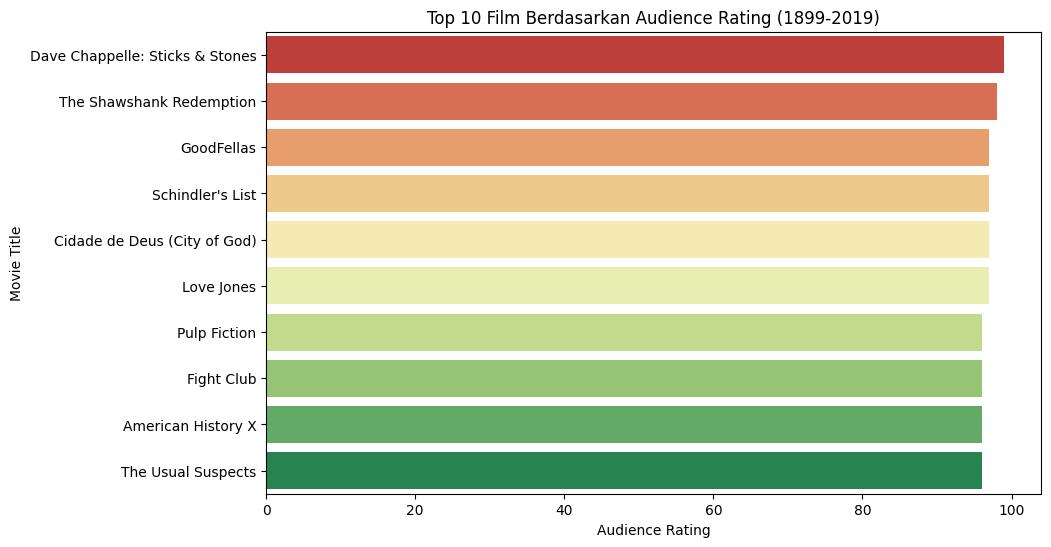

In [49]:
# Bar chart untuk film berdasarkan audience rating'''
plt.figure(figsize=(10,6))
sns.barplot(data=df_sorted_audience.head(10), x='audience_rating', y='movie_title', 
            palette="RdYlGn")
plt.title('Top 10 Film Berdasarkan Audience Rating (1899-2019)')
plt.xlabel('Audience Rating')
plt.ylabel('Movie Title')
plt.show()

Insight :  
- Dari diagram diatas saya dapatkan 10 film terbaik di rentang tahun release 1989 sampai 2019 dimana audience rating minimal adalah 25000 orang.
- Terlihat bahwa film dengan judul 'Dave Chappelle' : Stick & Stones berada di urutan pertama lalu disusul dengan The Shawshank Redemption
- Film-film ini bisa kita rekomendasikan ke client saya untuk dibeli atau disewa.
- Kalau ingin mencari opsi lebih banyak maka bisa ubah ke top 20, 50, 100 dan seterusnya

In [50]:
#Menampilkan film yang dirating oleh kritikus 
df_sorted_kritikus.head(10)

,movie_title,tomatometer_rating,tomatometer_count
10899,Paddington 2,100,235
8825,Leave No Trace,100,220
15415,Toy Story 2,100,169
9462,Man on Wire,100,158
13474,Taxi to the Dark Side,100,93
15414,Toy Story,100,88
8564,Knock Down the House,100,86
6577,GETT: The Trial of Viviane...,100,77
5094,Deliver Us from Evil,100,72
16022,Waste Land,100,71


C:\Users\maruf\AppData\Local\Temp\ipykernel_23008\733984180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_kritikus.head(10), x='tomatometer_rating', y='movie_title',


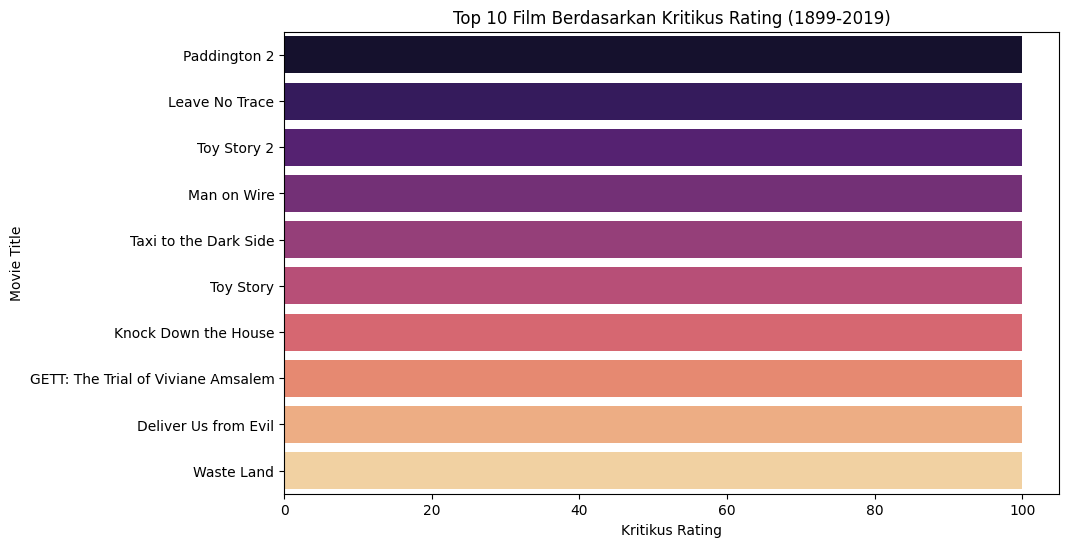

In [51]:
#Bar chart untuk film berdasarkan tomatometer rating atau kritikus rating
plt.figure(figsize=(10,6))
sns.barplot(data=df_sorted_kritikus.head(10), x='tomatometer_rating', y='movie_title', 
            palette='magma')
plt.title('Top 10 Film Berdasarkan Kritikus Rating (1899-2019)')
plt.xlabel('Kritikus Rating')
plt.ylabel('Movie Title')
plt.show()

Insight :  
- Dari diagram diatas saya mendapatkan 10 film dengan kritikus rating terbaik dari tahun 1899 - 2019. 
- Bisa dilihat bahwa film 'Paddington 2' memiliki kritikus rating paling tinggi berdasarkan jumlah kritikus rating pada tabel, yaitu berjumlah 235 kritikus.
- Disusul nomor 2 dan 3 adalah film Leave No Trace dan Toy Story 2
- Data ini bisa saya rekomendasikan kepada client saya yaitu Platform Streaming Online untuk dibeli atau disewa

## 5.2 Studio mana yang memproduksi paling banyak film yang dari tahun 1989 sampai 2019?

In [52]:
#Menghitung film yang dibuat per_studio 
filtered_df1 = df_v3[df_v3['studio_name'] != 'Unknown']
studio_counts = filtered_df1['studio_name'].value_counts()
studio_counts.head(10)

studio_name
IFC Films                           395
Warner Bros. Pictures               375
Universal Pictures                  357
20th Century Fox                    337
Sony Pictures Home Entertainment    275
Netflix                             274
Paramount Pictures                  266
Sony Pictures Classics              258
Magnolia Pictures                   250
Warner Home Video                   180
Name: count, dtype: int64

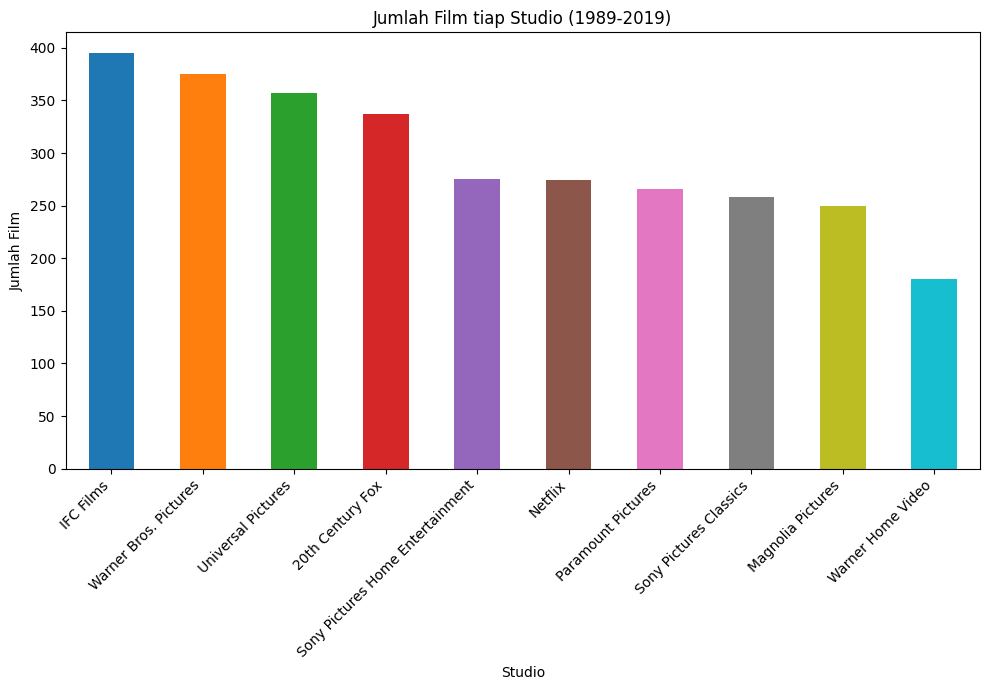

In [53]:
#Menunjukan diagram jumlah film yang di produksi oleh studio tanpa "Unknown" 
plt.figure(figsize=(10, 7))
studio_counts.head(10).plot(kind='bar', color=sns.color_palette("tab10"))

plt.title('Jumlah Film tiap Studio (1989-2019)')
plt.xlabel('Studio')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight :  
- Dari diagram dan tabel di atas saya mendapatkan 10 studio film dengan film paling banyak ini bisa jadi acuan untuk membeli film berdasarkan nama studio film. Karena bisa jadi ada orang yang orientasinya berdasarkan studio film, contoh : orang pasti akan menonton atau mengikuti film-film dari Marvel Studio  
- Terlihat juga dari diagram diatas bawah 'IFC Films' memiliki film yang paling banyak diantara studio film yang lain  
- Diikuti dengan 'Warner Bros. Pictures' dan Universal Picture di urutan kedua dan ketiga
- Rata-rata film yang di produksi oleh studio-studio ini ada lebih dari 200 film kecuali Warner Home Video yang diangka 180 film

## 5.3 Bagaimana tren genre film dari tahun 1989 sampai 2019?

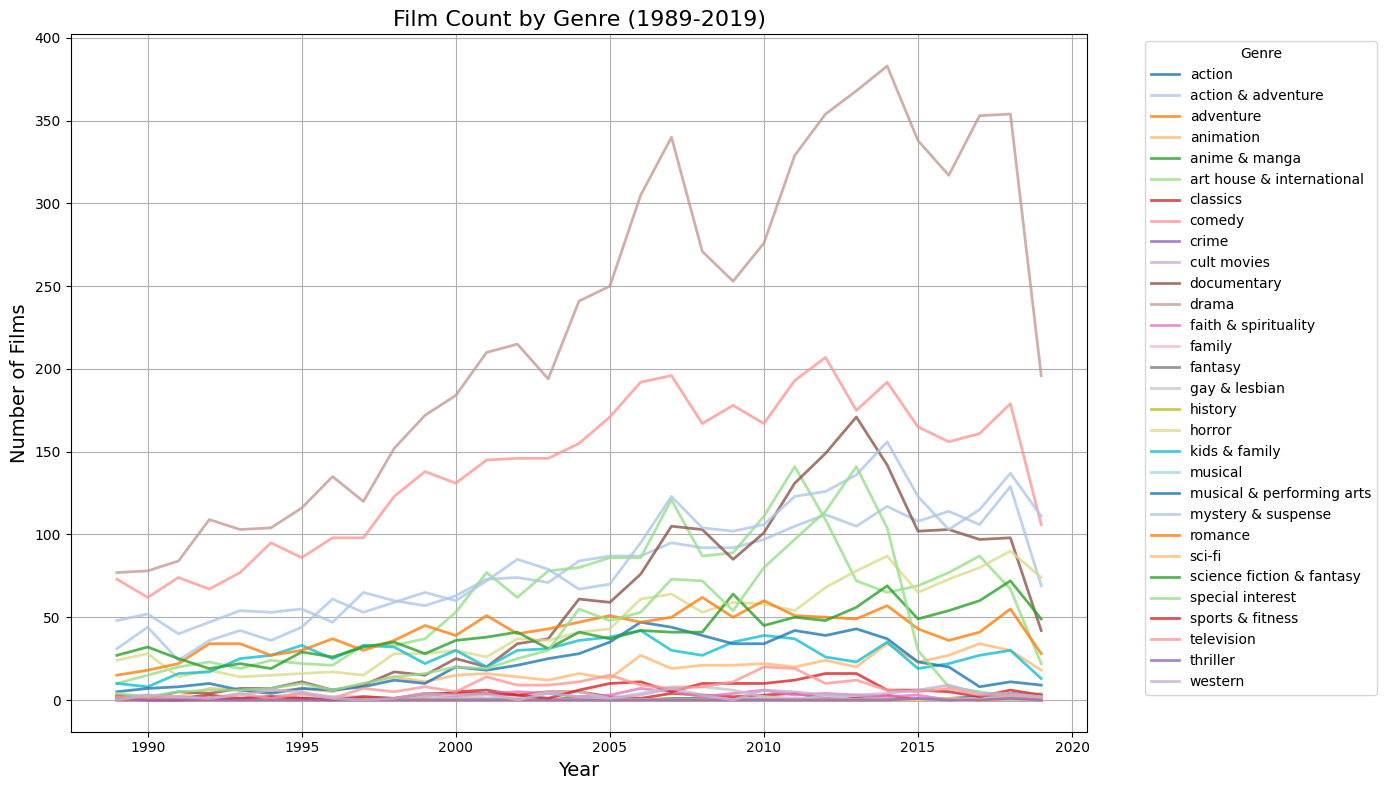

In [105]:
#Hitung Jumlah Genre Pertahun'''
film_counts = df_genre_exploded.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# memastikan tahun 1989 sampai 2019'''
all_years = pd.Index(range(1989, 2020))
film_counts = film_counts.reindex(all_years, fill_value=0)

# Plot grafik garis
plt.figure(figsize=(14, 8))

palette = sns.color_palette("tab20", n_colors=len(film_counts.columns))

for i, genre in enumerate(film_counts.columns):
    plt.plot(film_counts.index, film_counts[genre], label=genre, 
             linewidth=2, alpha=0.8, color=palette[i])

plt.title('Film Count by Genre (1989-2019)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Films', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight :  
- Dari line chart diatas bisa diambil kesimpulan genre yang terus naik adalah genre drama walaupun ternyata di 2018 an genre tersebut turun drastis, bisa jadi karena perubahan dari preferensi pasar, tapi overall genre ini konsisten terus naik dari tahun 1989  
- Di urutan kedua ada genre comedy walaupun disitu terlihat ada fluktuasi naik dan turun dan juga terjadi penuruan di tahun 2018 - 2019  
- Genre action dan adventure juga termasuk genre yang populer walaupun tidak setinggi drama dan comedy  
- Genre documeter ada kenaikan tajam di beberapa periode, kisaran 2009 sampai 2013  
- Dilihat secara keseluran rata-rata genre film turun produksinya di 2018 - 2019.

## 5.4 Apakah nama director mempengaruhi rating pentonton dan kritikus? Dan Mengapa itu bisa terjadi?

Saya akan melihat hubungan antara director dengan audience_rating dan tomatometer_rating. Sebelum menentukan metode apa yang akan saya gunakan, saya akan melihat skewness dari tomatometer_rating dan audience_rating.

In [78]:
#Melihat skewness tomatometer_rating dan audience_rating
skewness_tr = df_v3['tomatometer_rating'].skew()
skewness_ar = df_v3['audience_rating'].skew()
print (f"Skewness tomatometer_rating : {skewness_tr}")
print (f"Skewness audience_rating : {skewness_ar}")

Skewness tomatometer_rating : -0.30267791928981314
Skewness audience_rating : -0.2557313353444054


Insight :  
- Terlihat bahwa rating pada audience dan kritikus mempunyai skewness yang miring ke kiri  
- Walaupun tidak terlalu besar saya akan menggunakan metode Kruskal-Wallis untuk melihat korelasi kolom audience_rating dengan directors dan tomatometer_rating dengan directors, karena kolom directors memiliki banyak nama director bukan cuma 2 nama saja.

**Hipotesis** :  
H1 : Ada setidaknya satu perbedaan median audience_rating yang signifikan antar kelompok berdasarkan directors.  
Artinya, nama sutradara memiliki pengaruh signifikan terhadap rating penonton.
   
H0 : Tidak ada perbedaan signifikan median audience_rating antar kelompok berdasarkan directors.  
Artinya, nama sutradara tidak mempengaruhi rating penonton secara signifikan

In [ ]:
#Uji Kruskal-Wallis audience_rating dengan directors
groups = [df_v3[df_v3['directors'] == director]['audience_rating'] for director in df_v3['directors'].unique()]

stat, p_value = kruskal(*groups)

print(f"Statistik Kruskal-Wallis: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Ada setidaknya satu perbedaan median audience_rating yang signifikan antar kelompok berdasarkan directors")
else:
    print("Tidak ada perbedaan signifikan median audience_rating antar kelompok berdasarkan directors")

Statistik Kruskal-Wallis: 8890.693944794568
P-value: 1.1859481032976305e-30
Ada setidaknya satu perbedaan median audience_rating yang signifikan antar kelompok berdasarkan directors


Insight :  
- H0 tertolak, karena p-valuenya kurang dari 0.05 , dimana berarti ada setidaknya satu perbedaan median audience_rating yang signifikan antar kelompok berdasarkan directors 
- Artinya nama sutradara mempengaruhi rating penonton  
- Hal ini bisa terjadi karena perbedaan gaya sutradara dimana tiap sutradara/ directors pasti memiliki artstyle-nya masing-masing
- Ini juga bisa terjadi karena beberapa directors/sutradara pasti lebih terkenal dibandingkan yang lain
- Sutradara tertentu juga biasanya mempunyai preferensi aktor, writers dan kru yang berbeda-beda

----------------------------------------------------------------------------------------------------------------------------------------------------

**Hipotesis** :  
H1 : Ada setidaknya satu perbedaan median tomatometer_rating yang signifikan antar kelompok berdasarkan directors.  
Artinya, nama sutradara memiliki pengaruh signifikan terhadap rating kritikus.
   
H0 : Tidak ada perbedaan signifikan median tomatometer_rating antar kelompok berdasarkan directors.  
Artinya, nama sutradara tidak mempengaruhi rating kritikus secara signifikan

In [96]:
#Uji Kruskal-Wallis tomatometer_rating dengan directors
groups = [df_v3[df_v3['directors'] == director]['tomatometer_rating'] for director in df_v3['directors'].unique()]

stat, p_value = kruskal(*groups)

print(f"Statistik Kruskal-Wallis: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Ada setidaknya satu perbedaan median tomatometer_rating yang signifikan antar kelompok berdasarkan directors")
else:
    print("Tidak ada perbedaan signifikan median tomatometer_rating antar kelompok berdasarkan directors")

Statistik Kruskal-Wallis: 9737.768467615706
P-value: 2.2675993204408893e-68
Ada setidaknya satu perbedaan median tomatometer_rating yang signifikan antar kelompok berdasarkan directors


Insight :  
- Karena p-value kurang dari 0.05 maka H0 tertolak, jadi ada setidaknya satu perbedaan median tomatometer_rating yang signifikan antar kelompok berdasarkan directors  
- Berarti nama sutradara mempengaruhi juga rating kritikus  
- Ternyata ada beberapa sutradara yang memang lebih outstanding filmnya di bandingkan sutradara yang lain  
- Semua hal itu bisa jadi karena pengalaman dan pemilihan kru, writers serta castnya

## 5.5 Siapa director yang memiliki rata-rata rating filmnya paling tinggi?

Setelah melihat hubungan antara directors dan audience_rating/tomatometer_rating maka melihat film berdasarkan preferensi directors (sutradara) menjadi lebih relevan.

In [55]:
# Melihat director denga rating film tertinggi berdasarkan audience_rating dan audience count
director_stats_aud = df_v3.groupby('directors').agg({
    'audience_rating': 'mean',
    'audience_count': 'sum'
}).reset_index()

director_stats_aud = director_stats_aud[director_stats_aud['audience_count'] >= 25000]

director_stats_aud = director_stats_aud.sort_values(['audience_rating', 'audience_count'], ascending=False)

director_stats_aud.head(20)

,directors,audience_rating,audience_count
6540,Stan Lathan,99.000000,39456.0
2307,"Fernando Meirelles, Kátia ...",97.000000,251959.0
6861,Theodore Witcher,97.000000,25700.0
3780,Josh Cooley,94.000000,53114.0
4250,"Lee Unkrich, Adrian Molina",94.000000,26889.0
4362,Louie Psihoyos,94.000000,25728.0
6106,"Roger Allers, Rob Minkoff",93.000000,1269333.0
7291,Wolfgang Becker,93.000000,55833.0
3837,Juan José Campanella,93.000000,28477.0
1140,Charles Ferguson (III),92.500000,37730.0


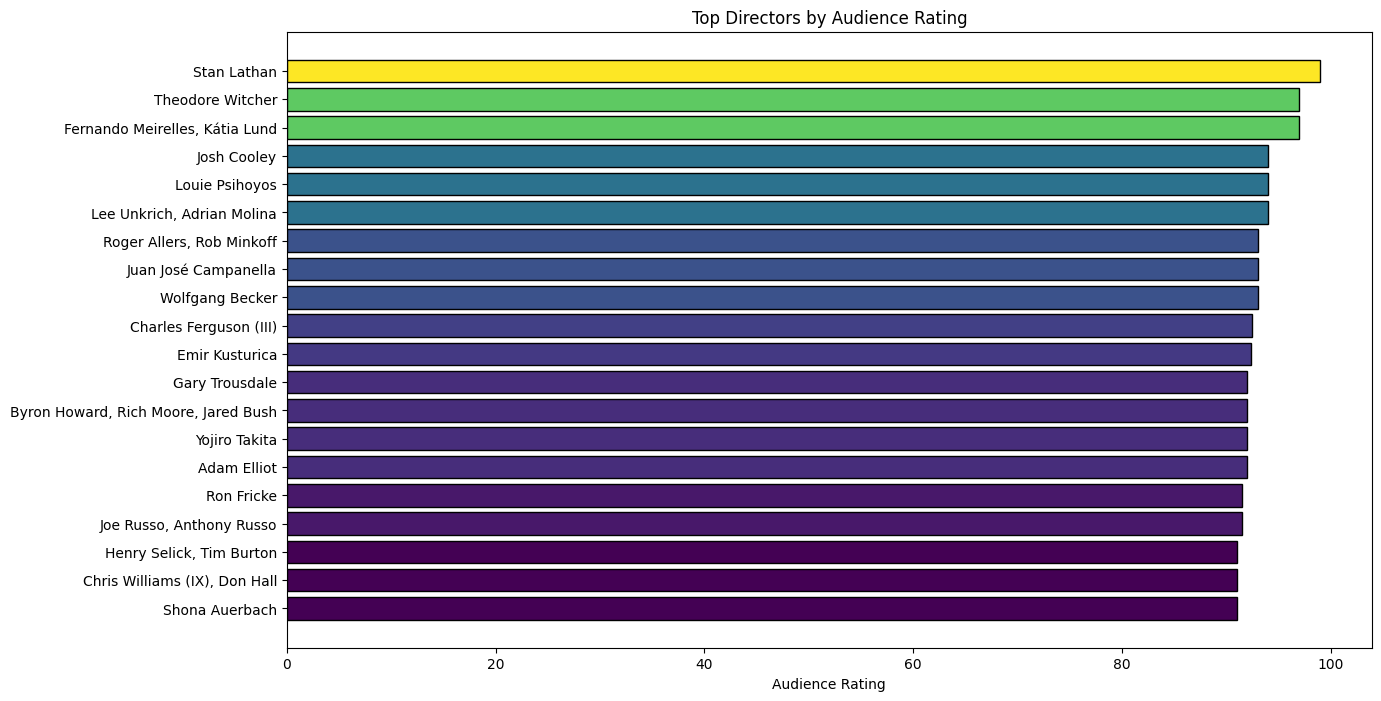

In [62]:
# Diagram top director yang rating paling tinggi berdasarkan audience
top_directors_byAud = director_stats_aud.sort_values('audience_rating', ascending=False).head(20)
ratings = top_directors_byAud['audience_rating']
names = top_directors_byAud['directors']

# Normalisasi rating antara 0 dan 1
norm_ratings = (ratings - ratings.min()) / (ratings.max() - ratings.min())

# Gunakan colormap viridis untuk warna gradasi
colors = plt.cm.viridis(norm_ratings)

plt.figure(figsize=(14, 8))
plt.barh(names, ratings, color=colors, edgecolor='black')
plt.gca().invert_yaxis()
plt.xlabel('Audience Rating')
plt.title('Top Directors by Audience Rating')
plt.show()

Insight :  
- Disini saya dapatkan ada 20 directors dengan rating paling tinggi 
- Stan Lathan adalah director dengan rating film paling tinggi dengan Theodore Witcher di urutan kedua serta Fernando Meirelles dan Katia Lund di urutan ke-tiga
- Tenyata Russo Brothers (Joe Russo dan Anthony Russo) director film Avengers - Endgame juga masuk 20 besar di urutan ke 17
- Ini bisa jadi rekomendasi untuk client kita, jadi bukan berdasarkan nama film saja tapi juga berdasarkan top directors

In [95]:
#Melihat director dengan rating film tertinggi berdasarkan kritikus rating
director_stats_crit = df_v3.groupby('directors').agg({
    'tomatometer_rating': 'mean',
    'tomatometer_count': 'sum'
}).reset_index()

director_stats_crit = director_stats_crit[director_stats_crit['tomatometer_count'] >= 50]

director_stats_crit = director_stats_crit.sort_values(['tomatometer_rating', 'tomatometer_count'], ascending=False)

director_stats_crit.head(20)

,directors,tomatometer_rating,tomatometer_count
3536,John Lasseter,100.0,257
5752,Rachel Lears,100.0,86
6467,"Shlomi Elkabetz, Ronit Elk...",100.0,77
4388,"Lucy Walker, João Jardim, ...",100.0,71
3226,Jehane Noujaim,100.0,68
2704,Havana Marking,100.0,62
6273,Sandi Tan,100.0,61
4335,Lixin Fan,100.0,54
813,Bo Burnham,99.5,317
2624,Greta Gerwig,99.0,379


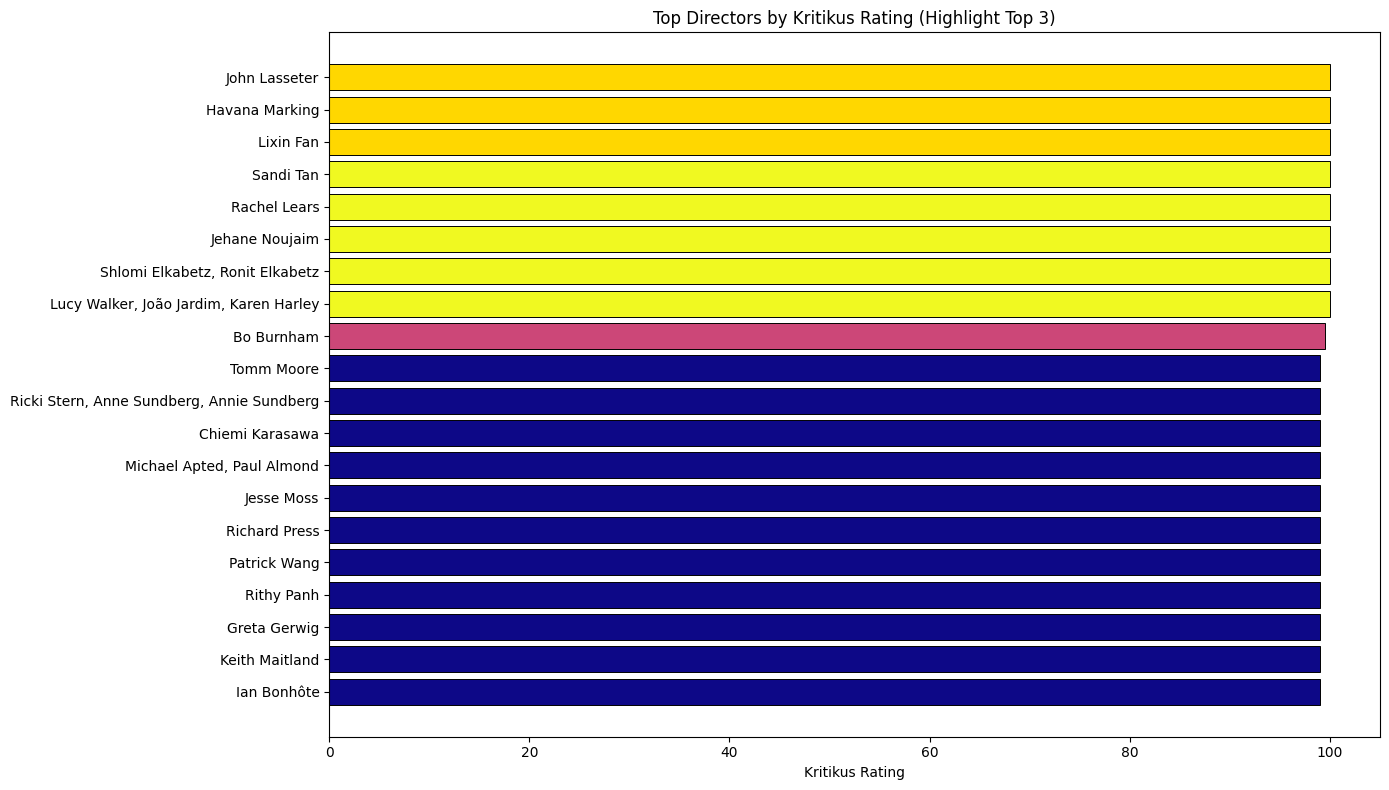

In [73]:
#Diagram 10 besar director yang rating paling tinggi berdasarkan kritikus
top_directors_byCrit = director_stats_crit.sort_values('tomatometer_rating', ascending=False).head(20)
ratings = top_directors_byCrit['tomatometer_rating']
names = top_directors_byCrit['directors']

# Normalisasi rating untuk colormap
norm_ratings = (ratings - ratings.min()) / (ratings.max() - ratings.min())

# Warna dasar dengan colormap plasma
base_colors = plt.cm.plasma(norm_ratings)

# Highlight warna khusus untuk top 3
colors = []
for i in range(len(ratings)):
    if i < 3:  # highlight top 3 dengan warna emas keemasan
        colors.append('#FFD700')  # gold color
    else:
        colors.append(base_colors[i])

plt.figure(figsize=(14, 8))
plt.barh(names, ratings, color=colors, edgecolor='black', linewidth=0.7)
plt.gca().invert_yaxis()
plt.xlabel('Kritikus Rating')
plt.title('Top Directors by Kritikus Rating (Highlight Top 3)')
plt.tight_layout()
plt.show()


Insight :  
- Disini saya mendapatkan 20 top director sesuai dengan rating kritikus  
- John Lasseter berada di urutan pertama dimana urutan kedua sampai kedelapan ratingnya sama, yang membedakan cuma jumlah kritikus yang merating
- Ini bisa jadi rekomendasi untuk membeli atau menyewa film berdasarkan top director

## 5.6 Berapa rata-rata, modus dan median durasi film dari tahun 1989 sampai 2019?

### a. Menghitung rata-rata dan nilai tengah dari durasi film

In [97]:
#cek rata-rata durasi film keseluruhan'''
ratarata_durasifilm = df_v3['runtime_in_minutes'].mean()
print(f'rata-rata durasi film dari tahun 1989 ke 2019 adalah : {ratarata_durasifilm:.2f}')

#cek nilai tengah dari durasi film keseluruhan'''
nilaitengah_durasifilm = df_v3['runtime_in_minutes'].median()
print(f'nilai tengah durasi film dari tahun 1989 ke 2019 adalah : {nilaitengah_durasifilm:.2f}')

rata-rata durasi film dari tahun 1989 ke 2019 adalah : 101.54
nilai tengah durasi film dari tahun 1989 ke 2019 adalah : 98.00


Insight :   
- Bisa dilihat bawah median dari durasi film adalah 98 menit
- Bisa diambil kesimpulan rata-rata menit film yang di tonton adalah 101 menit  
- Melihat dari mean dan median yang tidak jauh beda berarti tidak ada outlier pada kolom durasi film

## 5.7 Apakah durasi film pendek dan durasi film panjang mempengaruhi rating penonton?

Hipotesis yang tepat untuk pertanyaan ini adalah  

- H0 = Tidak ada hubungan yang signifikan antara durasi film (pendek maupun panjang) terhadap rating penonton
- H1 = Ada hubungan yang significkan antara durasi film (pendek maupun panjang) terhadap rating penonton

Disini saya akan melihat apakah ada hubungan antara durasi film dan rating penonton dengan menghitung P-Value dan menggunakan metode spearman untuk perbandingannya

In [99]:
#Filter dulu di audience countnya lebih dari 25000 supaya lebih make sense'''
filtered_duration = df_v3[df_v3['audience_count'] >= 25000].copy()

#Tentukan threshold supaya jelas mana film panjang mana film pendek'''
threshold = 90

#Menambah kolom durasi_kategori'''
filtered_duration['duration_category'] = filtered_duration['runtime_in_minutes'].apply(lambda x: 'Pendek' if x < threshold else 'Panjang')

#Hitung korelasi spearman, dan p valuenya'''
corr_spearman, p_value_spearman = spearmanr(filtered_duration['runtime_in_minutes'], filtered_duration['audience_rating'])

print("Korelasi Spearman:", corr_spearman)
print("P-value:", p_value_spearman)


Korelasi Spearman: 0.3421947087429093
P-value: 5.1428991179714946e-102


Insight :  
1. Korelasi Spearman 0.34
  - Nilai 0.34 menunjukkan hubungan yang positif sedang, akan tetapi durasi panjang dan pendek bukan satu-satunya faktor yang mempengaruhi rating penonton
  - H1 terpenuhi dan otomatis H0 ditolak
2. P-value 5.1428991179714946e-102
  - Menunjukan hubungan ini bukan kebetulan, jadi memang ada hubungan walaupun kecil
  - Durasi film yang panjang bisa membuktikan rating audience lebih tinggi

Setelah melihat korelasinya saya akan melihat kuat hubungannya menggunakan koefisien korelasi spearman

In [111]:
# Melihat kekuatan hubungan antara duration minutes dengan rating penonton
import scipy.stats as stats

# Hitung korelasi Spearman antara durasi film dan audience_rating
rho, p_value = stats.spearmanr(df_v3['runtime_in_minutes'], df_v3['audience_rating'])

print(f"Korelasi Spearman: rho = {rho:.4f}, p-value = {p_value:.4g}")

if abs(rho) < 0.2:
    print(f"Hubungan antara audience_rating dan durasi film sangat lemah atau hampir tidak ada ({rho:.4f})")
elif 0.2 <= abs(rho) < 0.4:
    print(f"Hubungan antara audience_rating dan durasi film lemah ({rho:.4f})")
elif 0.4 <= abs(rho) < 0.6:
    print(f"Hubungan antara audience_rating dan durasi film sedang ({rho:.4f})")
elif 0.6 <= abs(rho) < 0.8:
    print(f"Hubungan antara audience_rating dan durasi film kuat ({rho:.4f})")
else:  # 0.8 <= abs(rho) <= 1
    print(f"Hubungan antara audience_rating dan durasi film sangat kuat ({rho:.4f})")

Korelasi Spearman: rho = 0.1951, p-value = 1.255e-113
Hubungan antara audience_rating dan durasi film sangat lemah atau hampir tidak ada (0.1951)


Insight :  
- Dari hasil rho diatas bisa disimpulkan kekuatan hubungan duration_minutes dengan audience_rating sangat lemah

## 5.8 Apakah nama-nama cast mempengaruhi rating penonton dan rating kritikus?

Hipotesis 1  

H0 : Tidak ditemukan perbedaan median tomatometer_rating yang signifikan antar grup cast  
H1 : Terdapat perbedaan median tomatometer_rating yang signifikan antar grup cast  

Hipotesis 2  

H0 : Tidak ditemukan perbedaan median audience_rating yang signifikan antar grup cast  
H1 : Terdapat perbedaan median audience_rating yang signifikan antar grup cast

In [ ]:
# Atur data rating per grup cast untuk tomatometer_rating
groups_tomatometer = [group['tomatometer_rating'].values for _, group in df_v3.groupby('cast')]

# Atur data rating per grup cast untuk audience_rating
groups_audience = [group['audience_rating'].values for _, group in df_v3.groupby('cast')]

# Uji Kruskal-Wallis untuk tomatometer_rating berdasarkan cast
stat_tomato, p_tomato = stats.kruskal(*groups_tomatometer)

# Uji Kruskal-Wallis untuk audience_rating berdasarkan cast
stat_audience, p_audience = stats.kruskal(*groups_audience)

print(f"Kruskal-Wallis test untuk Tomatometer Rating:\nH = {stat_tomato:.4f}, p-value = {p_tomato:.4e}")
print(f"Kruskal-Wallis test untuk Audience Rating:\nH = {stat_audience:.4f}, p-value = {p_audience:.4e}")

# Interpretasi hasil
if p_tomato < 0.05:
    print("Terdapat perbedaan median tomatometer_rating yang signifikan antar grup cast (tolak H0).")
else:
    print("Tidak ditemukan perbedaan median tomatometer_rating yang signifikan antar grup cast (gagal tolak H0).")

if p_audience < 0.05:
    print("Terdapat perbedaan median audience_rating yang signifikan antar grup cast (tolak H0).")
else:
    print(" (gagal tolak H0).")

Kruskal-Wallis test untuk Tomatometer Rating:
H = 13201.5206, p-value = 4.3112e-01
Kruskal-Wallis test untuk Audience Rating:
H = 13188.7113, p-value = 4.6227e-01
Tidak ditemukan perbedaan median tomatometer_rating yang signifikan antar grup cast (gagal tolak H0).
Tidak ditemukan perbedaan median audience_rating yang signifikan antar grup cast (gagal tolak H0).


Insight :  
- Dari kedua uji krukal-wallis diatas bahwa tidak ada hubungannya antara cast dengan tomatometer_rating dan cast dengan audience_rating, maka H0 dari kedua hipotesis tersebut tertolak
- Maka dari itu tidak perlu melihat bagaimana **rekomendasi film yang tepat berdasarkan kombinasi data rating, director, dan cast populer**

# **BAB 6 - EXPORT DATAFRAME**

In [ ]:
#Export clean file ke excel untuk dibuat dashboardnya
df_v3.to_excel('Rotten Tomatoes Movies Clean.xlsx', index=False)

df_genre_exploded.to_excel('Genre_Table.xlsx', index=False)

# **BAB 7 - CONCLUSION**

Dari Analisis ini bisa disimpulkan tujuan mencari preferensi film dari untuk platform streaming telah tercapai. Karena kita kita bisa melihat point-point dibawah ini telah terjawab
1. Rating kritikus dan penonton dapat dijadikan indikator utama dalam memilih film untuk disewa atau dibeli oleh platform streaming.
2. Durasi film memiliki korelasi positif terhadap rating audience, walaupun tidak terlalu kuat.
3. Sutradara (director) terbukti memiliki pengaruh signifikan terhadap rating film, baik dari sisi kritikus maupun penonton.
4. Genre tertentu menunjukkan tren kenaikan popularitas dari waktu ke waktu, dan patut dipertimbangkan dalam strategi akuisisi konten.
5. Tidak ada hubungannya nama-nama cast dengan rating_audience, maka diperlukan kolom views / jumlah penonton per-film yang mungkin bisa menjadi referensi rekomendasi film juga
5. Pemilihan film yang tepat dan berkualitas berpotensi meningkatkan loyalitas pelanggan terhadap platform streaming.